# Fintech Project - Intelligence Personal Investment Consultant

### Load packages

In [446]:
import time
notebookstart= time.time()

import pandas as pd
import numpy as np

# Gradient Boosting
import xgboost as xgb
import lightgbm as lgb

# Models Packages
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn import linear_model, datasets

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab as pl

# Data Preparation

### 2015 Loan Data

In [260]:
df_2015 = pd.read_csv('Loan_2015/LoanStats3d.csv', skiprows=1)

C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [261]:
pd.set_option('display.max_columns', None)

In [262]:
df_2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,16000.0,16000.0,16000.0,60 months,12.88%,363.07,C,C2,Senior Structural Designer,1 year,MORTGAGE,70000.0,Not Verified,Dec-2015,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,786xx,TX,26.40,0.0,Feb-1988,0.0,NaN,NaN,13.0,0.0,28705.0,56.3%,29.0,w,9270.19,9270.19,10863.480000,10863.48,6729.81,4133.67,0.0,0.0,0.0,Jul-2018,363.07,Jul-2018,Jun-2018,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,265836.0,0.0,2.0,0.0,2.0,13.0,33702.0,74.0,1.0,1.0,8739.0,64.0,51000.0,0.0,0.0,1.0,3.0,24167.0,17922.0,61.0,0.0,0.0,147.0,334.0,9.0,9.0,2.0,9.0,NaN,11.0,NaN,0.0,4.0,6.0,5.0,12.0,6.0,10.0,21.0,6.0,13.0,0.0,0.0,0.0,1.0,100.0,60.0,0.0,0.0,309638.0,62407.0,45900.0,45838.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,18500.0,18500.0,18500.0,60 months,12.88%,419.80,C,C2,Supply Chain Coord.,10+ years,MORTGAGE,70000.0,Source Verified,Dec-2015,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,752xx,TX,13.20,0.0,Jun-2002,1.0,45.0,NaN,9.0,0.0,15883.0,57.8%,19.0,w,0.00,0.00,21912.002988,21912.00,18500.00,3412.00,0.0,0.0,0.0,Aug-2017,14388.69,NaN,Aug-2017,0.0,86.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,123863.0,1.0,2.0,1.0,2.0,11.0,12681.0,71.0,2.0,3.0,5431.0,63.0,27500.0,0.0,0.0,2.0,5.0,13763.0,11617.0,57.8,0.0,0.0,154.0,162.0,3.0,3.0,2.0,3.0,86.0,2.0,86.0,1.0,6.0,6.0,6.0,11.0,4.0,6.0,13.0,6.0,9.0,0.0,0.0,0.0,3.0,89.5,16.7,0.0,0.0,143748.0,28564.0,27500.0,17944.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,16000.0,16000.0,16000.0,60 months,17.97%,406.04,D,D4,Professional Sales Associa

In [263]:
df_2015.shape

(421097, 145)

In [264]:
for col in np.sort(df_2015.columns.values):
    print(col)

acc_now_delinq
acc_open_past_24mths
addr_state
all_util
annual_inc
annual_inc_joint
application_type
avg_cur_bal
bc_open_to_buy
bc_util
chargeoff_within_12_mths
collection_recovery_fee
collections_12_mths_ex_med
debt_settlement_flag
debt_settlement_flag_date
deferral_term
delinq_2yrs
delinq_amnt
desc
disbursement_method
dti
dti_joint
earliest_cr_line
emp_length
emp_title
funded_amnt
funded_amnt_inv
grade
hardship_amount
hardship_dpd
hardship_end_date
hardship_flag
hardship_last_payment_amount
hardship_length
hardship_loan_status
hardship_payoff_balance_amount
hardship_reason
hardship_start_date
hardship_status
hardship_type
home_ownership
id
il_util
initial_list_status
inq_fi
inq_last_12m
inq_last_6mths
installment
int_rate
issue_d
last_credit_pull_d
last_pymnt_amnt
last_pymnt_d
loan_amnt
loan_status
max_bal_bc
member_id
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_last_delinq
mths_since_last_major_derog
mths_since_last_record
mths_si

### Current Data

In [78]:
df_current = pd.read_json('Loan_2015/current_list.txt')

In [79]:
df_current.head()

,accNowDelinq,accOpenPast24Mths,acceptD,addrState,addrZip,allUtil,annualInc,annualIncJoint,applicationType,avgCurBal,bcOpenToBuy,bcUtil,chargeoffWithin12Mths,collections12MthsExMed,creditPullD,delinq2Yrs,delinqAmnt,desc,disbursementMethod,dti,dtiJoint,earliestCrLine,empLength,empTitle,expD,expDefaultRate,ficoRangeHigh,ficoRangeLow,fundedAmount,grade,homeOwnership,housingPayment,iLUtil,id,ilsExpD,initialListStatus,inqFi,inqLast12m,inqLast6Mths,installment,intRate,investorCount,isIncV,isIncVJoint,listD,loanAmount,maxBalBc,memberId,moSinOldIlAcct,moSinOldRevTlOp,moSinRcntRevTlOp,moSinRcntTl,mortAcc,mtgPayment,mthsSinceLastDelinq,mthsSinceLastMajorDerog,mthsSinceLastRecord,mthsSinceRcntIl,mthsSinceRecentBc,mthsSinceRecentBcDlq,mthsSinceRecentInq,mthsSinceRecentRevolDelinq,numAcctsEver120Ppd,numActvBcTl,numActvRevTl,numBcSats,numBcTl,numIlTl,numOpRevTl,numRevAccts,numRevTlBalGt0,numSats,numTl120dpd2m,numTl30dpd,numTl90gDpd24m,numTlOpPast12m,openAcc,openAcc6m,openActIl,openIl12m,openIl24m,openRv12m,openRv24m,pctTlNvrDlq,percentBcGt75,pubRec,pubRecBankruptcies,purpose,reviewStatus,reviewStatusD,revolBal,revolBalJoint,revolUtil,secAppChargeoffWithin12Mths,secAppCollections12MthsExMed,secAppEarliestCrLine,secAppFicoRangeHigh,secAppFicoRangeLow,secAppInqLast6Mths,secAppMortAcc,secAppMthsSinceLastMajorDerog,secAppNumRevAccts,secAppOpenAcc,secAppOpenActIl,secAppRevolUtil,serviceFeeRate,subGrade,taxLiens,term,totCollAmt,totCurBal,totHiCredLim,totalAcc,totalBalExMort,totalBalIl,totalBcLimit,totalCuTl,totalIlHighCreditLimit,totalRevHiLim
0,0,4,2018-04-20T15:28:50.000-07:00,SC,298xx,57.7,68000.0,NaN,INDIVIDUAL,5813,1417.0,49.4,0,1,2018-04-20T15:26:20.000-07:00,6,0,NaN,CASH,34.84,NaN,1995-05-19T17:00:00.000-07:00,120.0,foreman,2018-05-25T10:00:00.000-07:00,11.12,674,670,1975,D,MORTGAGE,348.0,61.0,132018117,2018-04-25T10:00:00.000-07:00,F,3,5,3,71.78,17.47,NaN,SOURCE_VERIFIED,None,2018-04-25T10:00:00.000-07:00,2000,550,148113613,215.0,275,2,2,0,0.00,17.0,26.0,NaN,4.0,2.0,19.0,1.0,19.0,1,3,7,3,10,27,9,27,7,8,0.0,0,0,2,13,2,4,1,2,1,2,83,0.0,0,0,debt_consolidation,APPROVED,2018-04-25T09:41:38.000-07:00,5337,NaN,45.6,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.36,D1,0,36,0,63943,103275,55,63943,58606,2800,0,91575,11700
1,0,10,2018-04-06T12:30:35.000-07:00,NJ,071xx,66.2,42000.0,NaN,INDIVIDUAL,3877,16143.0,22.4,0,0,2018-04-06T12:20:42.000-07:00,0,0,NaN,CASH,33.97,NaN,2014-08-05T17:00:00.000-07:00,72.0,Machine Operator,2018-05-21T12:34:36.000-07:00,6.80,724,720,3950,C,RENT,300.0,96.0,131259709,2018-04-25T10:00:00.000-07:00,F,1,5,1,169.87,13.58,NaN,VERIFIED,None,2018-04-25T10:00:00.000-07:00,5000,3600,146935887,17.0,44,10,1,0,0.00,NaN,NaN,NaN,1.0,16.0,NaN,1.0,NaN,0,3,5,7,8,4,13,14,5,16,0.0,0,0,4,16,2,3,3,4,1,6,100,14.3,0,0,credit_card,APPROVED,2018-04-25T07:22:43.000-07:00,5361,NaN,15.5,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.13,C2,0,36,0,62026,93647,18,62026,56665,20800,0,59047,34600
2,0,9,2018-04-17T13:50:54.000-07:00,AZ,863xx,50.1,55680.0,NaN,INDIVIDUAL,1538,5588.0,64.9,0,0,2018-04-17T13:49:48.000-07:00,0,0,NaN,CASH,23.73,NaN,1996-06-16T17:00:00.000-07:00,60.0,MERCHANDISER,2018-05-25T10:00:00.000-07:00,6.80,674,670,950,C,RENT,450.0,61.5,131740374,2018-04-25T10:00:00.000-07:00,F,2,3,0,41.06,14.07,NaN,VERIFIED,None,2018-04-25T10:00:00.000-07:00,1200,3346,147695340,149.0,262,9,8,1,0.00,NaN,NaN,62.0,8.0,9.0,NaN,1.0,NaN,0,7,10,9,12,9,15,23,10,18,0.0,0,0,3,18,0,3,1,2,2,7,100,37.5,1,1,major_purchase,APPROVED,2018-04-25T08:34:29.000-07:00,11104,NaN,40.1,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.13,C3,0,36,0,26143,52145,33,26143,15039,15900,7,24445,27700
3,0,3,2018-04-07T10:16:36.000-07:00,WI,531xx,42.1,85000.0,NaN,INDIVIDUAL,17781,18062.0,31.1,0,0,2018-03-26T13:08:06.000-07:00,1,0,NaN,CASH,6.62,NaN,1996-08-25T17:00:00.000-07:00,120.0,Plumber,2018-05-22T10:25:17.000-07:00,3.80,674,670,2150,B,RENT,1000.0,72.7,130804353,2018-04-25T10:00:00.000-07:00,F,2,1,0,240.01,9.43,NaN,NOT_VERIFIED,None,2018-04-25T10:00:00.000-07:00,7500,4034,145

In [80]:
df_current.shape

(87, 119)

In [81]:
for col in np.sort(df_current.columns.values):
    print(col)

accNowDelinq
accOpenPast24Mths
acceptD
addrState
addrZip
allUtil
annualInc
annualIncJoint
applicationType
avgCurBal
bcOpenToBuy
bcUtil
chargeoffWithin12Mths
collections12MthsExMed
creditPullD
delinq2Yrs
delinqAmnt
desc
disbursementMethod
dti
dtiJoint
earliestCrLine
empLength
empTitle
expD
expDefaultRate
ficoRangeHigh
ficoRangeLow
fundedAmount
grade
homeOwnership
housingPayment
iLUtil
id
ilsExpD
initialListStatus
inqFi
inqLast12m
inqLast6Mths
installment
intRate
investorCount
isIncV
isIncVJoint
listD
loanAmount
maxBalBc
memberId
moSinOldIlAcct
moSinOldRevTlOp
moSinRcntRevTlOp
moSinRcntTl
mortAcc
mtgPayment
mthsSinceLastDelinq
mthsSinceLastMajorDerog
mthsSinceLastRecord
mthsSinceRcntIl
mthsSinceRecentBc
mthsSinceRecentBcDlq
mthsSinceRecentInq
mthsSinceRecentRevolDelinq
numAcctsEver120Ppd
numActvBcTl
numActvRevTl
numBcSats
numBcTl
numIlTl
numOpRevTl
numRevAccts
numRevTlBalGt0
numSats
numTl120dpd2m
numTl30dpd
numTl90gDpd24m
numTlOpPast12m
openAcc
openAcc6m
openActIl
openIl12m
openIl24m
ope

### Features
####  Make feaure names consistent in both current data and 2015 Loan data

In [82]:
Loan_feature = list(df_2015.columns.values)

In [83]:
for i in range(len(Loan_feature)):
    Loan_feature[i] = str(Loan_feature[i]).replace('_','')

In [84]:
for col in np.sort(Loan_feature):
    print(col)

accnowdelinq
accopenpast24mths
addrstate
allutil
annualinc
annualincjoint
applicationtype
avgcurbal
bcopentobuy
bcutil
chargeoffwithin12mths
collectionrecoveryfee
collections12mthsexmed
debtsettlementflag
debtsettlementflagdate
deferralterm
delinq2yrs
delinqamnt
desc
disbursementmethod
dti
dtijoint
earliestcrline
emplength
emptitle
fundedamnt
fundedamntinv
grade
hardshipamount
hardshipdpd
hardshipenddate
hardshipflag
hardshiplastpaymentamount
hardshiplength
hardshiploanstatus
hardshippayoffbalanceamount
hardshipreason
hardshipstartdate
hardshipstatus
hardshiptype
homeownership
id
ilutil
initialliststatus
inqfi
inqlast12m
inqlast6mths
installment
intrate
issued
lastcreditpulld
lastpymntamnt
lastpymntd
loanamnt
loanstatus
maxbalbc
memberid
mortacc
mosinoldilacct
mosinoldrevtlop
mosinrcntrevtlop
mosinrcnttl
mthssincelastdelinq
mthssincelastmajorderog
mthssincelastrecord
mthssincercntil
mthssincerecentbc
mthssincerecentbcdlq
mthssincerecentinq
mthssincerecentrevoldelinq
nextpymntd
numaccts

In [85]:
current_feature = list(df_current.columns.values)

In [86]:
for i in range(len(current_feature)):
    current_feature[i] = str.lower(current_feature[i])
    print(current_feature[i])

accnowdelinq
accopenpast24mths
acceptd
addrstate
addrzip
allutil
annualinc
annualincjoint
applicationtype
avgcurbal
bcopentobuy
bcutil
chargeoffwithin12mths
collections12mthsexmed
creditpulld
delinq2yrs
delinqamnt
desc
disbursementmethod
dti
dtijoint
earliestcrline
emplength
emptitle
expd
expdefaultrate
ficorangehigh
ficorangelow
fundedamount
grade
homeownership
housingpayment
ilutil
id
ilsexpd
initialliststatus
inqfi
inqlast12m
inqlast6mths
installment
intrate
investorcount
isincv
isincvjoint
listd
loanamount
maxbalbc
memberid
mosinoldilacct
mosinoldrevtlop
mosinrcntrevtlop
mosinrcnttl
mortacc
mtgpayment
mthssincelastdelinq
mthssincelastmajorderog
mthssincelastrecord
mthssincercntil
mthssincerecentbc
mthssincerecentbcdlq
mthssincerecentinq
mthssincerecentrevoldelinq
numacctsever120ppd
numactvbctl
numactvrevtl
numbcsats
numbctl
numiltl
numoprevtl
numrevaccts
numrevtlbalgt0
numsats
numtl120dpd2m
numtl30dpd
numtl90gdpd24m
numtloppast12m
openacc
openacc6m
openactil
openil12m
openil24m
ope

#### Select features

In [87]:
same_feature = set(Loan_feature) & set(current_feature)
same_feature

{'accnowdelinq',
 'accopenpast24mths',
 'addrstate',
 'allutil',
 'annualinc',
 'annualincjoint',
 'applicationtype',
 'avgcurbal',
 'bcopentobuy',
 'bcutil',
 'chargeoffwithin12mths',
 'collections12mthsexmed',
 'delinq2yrs',
 'delinqamnt',
 'desc',
 'disbursementmethod',
 'dti',
 'dtijoint',
 'earliestcrline',
 'emplength',
 'emptitle',
 'grade',
 'homeownership',
 'id',
 'ilutil',
 'initialliststatus',
 'inqfi',
 'inqlast12m',
 'inqlast6mths',
 'installment',
 'intrate',
 'maxbalbc',
 'memberid',
 'mortacc',
 'mosinoldilacct',
 'mosinoldrevtlop',
 'mosinrcntrevtlop',
 'mosinrcnttl',
 'mthssincelastdelinq',
 'mthssincelastmajorderog',
 'mthssincelastrecord',
 'mthssincercntil',
 'mthssincerecentbc',
 'mthssincerecentbcdlq',
 'mthssincerecentinq',
 'mthssincerecentrevoldelinq',
 'numactvbctl',
 'numactvrevtl',
 'numbcsats',
 'numbctl',
 'numiltl',
 'numoprevtl',
 'numrevaccts',
 'numrevtlbalgt0',
 'numsats',
 'numtl120dpd2m',
 'numtl30dpd',
 'numtl90gdpd24m',
 'numtloppast12m',
 'open

In [88]:
len(same_feature)

97

In [89]:
Loan_unique = set(Loan_feature) - set(current_feature)
Loan_unique

{'collectionrecoveryfee',
 'debtsettlementflag',
 'debtsettlementflagdate',
 'deferralterm',
 'fundedamnt',
 'fundedamntinv',
 'hardshipamount',
 'hardshipdpd',
 'hardshipenddate',
 'hardshipflag',
 'hardshiplastpaymentamount',
 'hardshiplength',
 'hardshiploanstatus',
 'hardshippayoffbalanceamount',
 'hardshipreason',
 'hardshipstartdate',
 'hardshipstatus',
 'hardshiptype',
 'issued',
 'lastcreditpulld',
 'lastpymntamnt',
 'lastpymntd',
 'loanamnt',
 'loanstatus',
 'nextpymntd',
 'numacctsever120pd',
 'origprojectedadditionalaccruedinterest',
 'outprncp',
 'outprncpinv',
 'paymentplanstartdate',
 'policycode',
 'pymntplan',
 'recoveries',
 'settlementamount',
 'settlementdate',
 'settlementpercentage',
 'settlementstatus',
 'settlementterm',
 'title',
 'totalpymnt',
 'totalpymntinv',
 'totalrecint',
 'totalreclatefee',
 'totalrecprncp',
 'url',
 'verificationstatus',
 'verificationstatusjoint',
 'zipcode'}

In [90]:
for col in df_2015.columns.values:
    df_2015.rename(columns={str(col): str(col).replace('_', '')}, inplace=True)

In [91]:
df_2015[list(Loan_unique)].tail()

,hardshipstartdate,settlementamount,settlementstatus,loanamnt,hardshipreason,verificationstatus,hardshiplength,settlementterm,hardshipamount,paymentplanstartdate,title,policycode,hardshipstatus,issued,totalrecprncp,outprncp,lastpymntd,debtsettlementflag,lastpymntamnt,pymntplan,numacctsever120pd,fundedamnt,settlementdate,totalrecint,nextpymntd,settlementpercentage,debtsettlementflagdate,loanstatus,hardshipenddate,totalpymntinv,totalreclatefee,deferralterm,fundedamntinv,hardshipflag,zipcode,collectionrecoveryfee,totalpymnt,url,origprojectedadditionalaccruedinterest,hardshiplastpaymentamount,hardshiploanstatus,hardshippayoffbalanceamount,verificationstatusjoint,hardshiptype,lastcreditpulld,hardshipdpd,outprncpinv,recoveries
421092,NaN,NaN,NaN,12000.0,NaN,Source Verified,NaN,NaN,NaN,NaN,Debt consolidation,1.0,NaN,Jan-2015,1552.69,0.0,Jan-2016,N,317.86,n,1.0,12000.0,NaN,2234.98,NaN,NaN,NaN,Charged Off,NaN,5366.99,0.0,NaN,12000.0,N,010xx,284.2776,5366.990000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oct-2016,NaN,0.0,1579.32
421093,NaN,NaN,NaN,13000.0,NaN,Verified,NaN,NaN,NaN,NaN,Debt consolidation,1.0,NaN,Jan-2015,2527.70,0.0,May-2016,N,316.07,n,0.0,13000.0,NaN,2506.32,NaN,NaN,NaN,Charged Off,NaN,6109.52,0.0,NaN,13000.0,N,378xx,193.5900,6109.520000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dec-2016,NaN,0.0,1075.50
421094,NaN,NaN,NaN,20000.0,NaN,Verified,NaN,NaN,NaN,NaN,Credit card refinancing,1.0,NaN,Jan-2015,20000.00,0.0,May-2017,N,5776.74,n,0.0,20000.0,NaN,3735.39,NaN,NaN,NaN,Fully Paid,NaN,23735.39,0.0,NaN,20000.0,N,331xx,0.0000,23735.386335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan-2018,NaN,0.0,0.00
421095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
len(Loan_unique)

48

In [93]:
current_unique = set(current_feature) - set(Loan_feature)
current_unique

{'acceptd',
 'addrzip',
 'creditpulld',
 'expd',
 'expdefaultrate',
 'ficorangehigh',
 'ficorangelow',
 'fundedamount',
 'housingpayment',
 'ilsexpd',
 'investorcount',
 'isincv',
 'isincvjoint',
 'listd',
 'loanamount',
 'mtgpayment',
 'numacctsever120ppd',
 'reviewstatus',
 'reviewstatusd',
 'secappficorangehigh',
 'secappficorangelow',
 'servicefeerate'}

In [94]:
len(current_unique)

22

In [95]:
for col in df_current.columns.values:
    df_current.rename(columns={str(col): str.lower(col)}, inplace=True)

In [96]:
df_current[list(current_unique)].head()

,housingpayment,ilsexpd,expdefaultrate,secappficorangehigh,fundedamount,ficorangehigh,numacctsever120ppd,acceptd,ficorangelow,addrzip,creditpulld,servicefeerate,listd,expd,secappficorangelow,isincvjoint,reviewstatusd,reviewstatus,investorcount,mtgpayment,isincv,loanamount
0,348.0,2018-04-25T10:00:00.000-07:00,11.12,NaN,1975,674,1,2018-04-20T15:28:50.000-07:00,670,298xx,2018-04-20T15:26:20.000-07:00,1.36,2018-04-25T10:00:00.000-07:00,2018-05-25T10:00:00.000-07:00,NaN,None,2018-04-25T09:41:38.000-07:00,APPROVED,NaN,0.00,SOURCE_VERIFIED,2000
1,300.0,2018-04-25T10:00:00.000-07:00,6.80,NaN,3950,724,0,2018-04-06T12:30:35.000-07:00,720,071xx,2018-04-06T12:20:42.000-07:00,1.13,2018-04-25T10:00:00.000-07:00,2018-05-21T12:34:36.000-07:00,NaN,None,2018-04-25T07:22:43.000-07:00,APPROVED,NaN,0.00,VERIFIED,5000
2,450.0,2018-04-25T10:00:00.000-07:00,6.80,NaN,950,674,0,2018-04-17T13:50:54.000-07:00,670,863xx,2018-04-17T13:49:48.000-07:00,1.13,2018-04-25T10:00:00.000-07:00,2018-05-25T10:00:00.000-07:00,NaN,None,2018-04-25T08:34:29.000-07:00,APPROVED,NaN,0.00,VERIFIED,1200
3,1000.0,2018-04-25T10:00:00.000-07:00,3.80,NaN,2150,674,0,2018-04-07T10:16:36.000-07:00,670,531xx,2018-03-26T13:08:06.000-07:00,0.96,2018-04-25T10:00:00.000-07:00,2018-05-22T10:25:17.000-07:00,NaN,None,2018-04-25T09:24:21.000-07:00,APPROVED,NaN,1699.29,NOT_VERIFIED,7500
4,955.0,2018-04-25T10:00:00.000-07:00,14.72,NaN,4650,669,0,2018-04-12T15:44:34.000-07:00,665,152xx,2018-04-12T15:35:34.000-07:00,1.58,2018-04-25T10:00:00.000-07:00,2018-05-25T10:00:00.000-07:00,NaN,None,2018-04-25T09:29:30.000-07:00,APPROVED,NaN,0.00,NOT_VERIFIED,9000


#### Below features have different names for 2015 Loan data and current data
df_2015, df_current 
<br>zipcode = addrzip
<br>fundedamnt = fundeamount
<br>verificationstatus = isincv
<br>verificationstatusjoint = isincvjoint
<br>loanamnt = loanamount
<br>numacctsever120pd = numacctsever120ppd

In [97]:
df_2015 = df_2015[list(same_feature) + ['zipcode','fundedamnt','verificationstatus','verificationstatusjoint','loanamnt','numacctsever120pd'] + ['issued','loanstatus']]

In [98]:
df_2015.shape

(421097, 105)

In [100]:
df_2015.to_csv('Loan_2015/loan_2015.csv',index=False)

# Data Processing

In [265]:
df = pd.read_csv('Loan_2015/loan_2015.csv')

C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4,48,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [266]:
df.tail()

,openacc,installment,intrate,delinqamnt,id,avgcurbal,totalbalil,openrv24m,ilutil,totalrevhilim,secappcollections12mthsexmed,secappnumrevaccts,grade,tothicredlim,disbursementmethod,emplength,numsats,accopenpast24mths,mthssincelastrecord,openil12m,numtloppast12m,annualinc,secappchargeoffwithin12mths,numrevtlbalgt0,annualincjoint,secappearliestcrline,secapprevolutil,openil24m,mthssincelastdelinq,inqfi,initialliststatus,revolbal,numactvrevtl,applicationtype,mthssincelastmajorderog,secappmortacc,totalilhighcreditlimit,purpose,subgrade,revolbaljoint,numtl120dpd2m,totalcutl,mosinrcntrevtlop,mortacc,inqlast6mths,mthssincerecentrevoldelinq,pubrec,numactvbctl,desc,totcollamt,percentbcgt75,mthssincerecentbc,addrstate,numbctl,secappopenactil,pubrecbankruptcies,openacc6m,bcopentobuy,totalacc,chargeoffwithin12mths,delinq2yrs,pcttlnvrdlq,mthssincerecentbcdlq,inqlast12m,collections12mthsexmed,taxliens,accnowdelinq,allutil,mthssincerecentinq,mosinoldilacct,term,totalbalexmort,secappmthssincelastmajorderog,numiltl,secappopenacc,mosinrcnttl,openactil,mthssincercntil,numrevaccts,dtijoint,mosinoldrevtlop,revolutil,totcurbal,totalbclimit,openrv12m,memberid,secappinqlast6mths,numtl30dpd,emptitle,dti,bcutil,numoprevtl,homeownership,numbcsats,maxbalbc,earliestcrline,numtl90gdpd24m,zipcode,fundedamnt,verificationstatus,verificationstatusjoint,loanamnt,numacctsever120pd,issued,loanstatus
421092,17.0,317.86,19.99%,0.0,NaN,3895.0,NaN,NaN,NaN,27000.0,NaN,NaN,E,96919.0,Cash,1 year,17.0,6.0,NaN,NaN,2.0,64400.0,NaN,7.0,NaN,NaN,NaN,NaN,22.0,NaN,w,8254.0,7.0,Individual,22.0,NaN,69919.0,debt_consolidation,E3,NaN,0.0,NaN,5.0,0.0,2.0,NaN,0.0,5.0,NaN,0.0,66.7,12.0,MA,7.0,NaN,0.0,NaN,3752.0,20.0,0.0,1.0,95.0,NaN,NaN,1.0,0.0,0.0,NaN,0.0,56.0,60 months,58418.0,NaN,3.0,NaN,5.0,NaN,NaN,16.0,NaN,83.0,30.6%,58418.0,9700.0,NaN,NaN,NaN,0.0,Painter,27.19,61.3,15.0,RENT,7.0,NaN,Oct-2003,1.0,010xx,12000.0,Source Verified,NaN,12000.0,1.0,Jan-2015,Charged Off
421093,9.0,316.07,15.99%,0.0,NaN,3798.0,NaN,NaN,NaN,18000.0,NaN,NaN,D,51239.0,Cash,5 years,9.0,7.0,84.0,NaN,3.0,35000.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,w,11031.0,6.0,Individual,NaN,NaN,33239.0,debt_consolidation,D2,NaN,0.0,NaN,6.0,0.0,0.0,NaN,1.0,4.0,NaN,0.0,50.0,17.0,TN,4.0,NaN,1.0,NaN,2554.0,22.0,0.0,0.0,100.0,NaN,NaN,0.0,0.0,0.0,NaN,10.0,134.0,60 months,34178.0,NaN,12.0,NaN,6.0,NaN,NaN,10.0,NaN,108.0,61.3%,34178.0,10600.0,NaN,NaN,NaN,0.0,Radiologist Technologist,30.90,75.9,7.0,RENT,4.0,NaN,Sep-2003,0.0,378xx,13000.0,Verified,NaN,13000.0,0.0,Jan-2015,Charged Off
421094,8.0,664.20,11.99%,0.0,NaN,4163.0,NaN,NaN,NaN,41700.0,NaN,NaN,B,43740.0,Cash,10+ years,8.0,1.0,110.0,NaN,1.0,100000.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,f,33266.0,5.0,Individual,NaN,NaN,0.0,credit_card,B5,NaN,0.0,NaN,5.0,0.0,1.0,NaN,1.0,5.0,NaN,0.0,50.0,5.0,FL,7.0,NaN,0.0,NaN,8434.0,10.0,0.0,0.0,100.0,NaN,NaN,0.0,1.0,0.0,NaN,0.0,146.0,36 months,33307.0,NaN,1.0,NaN,5.0,NaN,NaN,7.0,NaN,155.0,79.8%,33307.0,41700.0,NaN,NaN,NaN,0.0,Manager Hotel Operations Oasis,10.83,79.8,6.0,RENT,6.0,NaN,Dec-2001,0.0,331xx,20000.0,Verified,NaN,20000.0,0.0,Jan-2015,Fully Paid
421095,NaN,NaN,NaN,NaN,Total amount funded in policy code 1: 6417608175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421096,NaN,NaN,NaN,NaN,Total amount funded in policy code 2: 1944088810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [267]:
# delete the last two rows
df = df[:-2]

In [268]:
df.shape

(421095, 105)

In [269]:
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421095 entries, 0 to 421094
Data columns (total 105 columns):
openacc                          421095 non-null float64
installment                      421095 non-null float64
intrate                          421095 non-null object
delinqamnt                       421095 non-null float64
id                               0 non-null object
avgcurbal                        421095 non-null float64
totalbalil                       21372 non-null float64
openrv24m                        21372 non-null float64
ilutil                           18617 non-null float64
totalrevhilim                    421095 non-null float64
secappcollections12mthsexmed     0 non-null float64
secappnumrevaccts                0 non-null float64
grade                            421095 non-null object
tothicredlim                     421095 non-null float64
disbursementmethod               421095 non-null object
emplength                        397278 non-null object

In [270]:
# separate the categorical and numerical data
all_null_feature=[]
num_feature=[]
ob_feature=[]
for col in df.columns:
    if df[col].isnull().sum()==df.shape[0]:
        all_null_feature.append(col)
    else:
        if df[col].dtype == 'object':
            ob_feature.append(col)
        else:
            num_feature.append(col)

In [271]:
all_null_feature

['id',
 'secappcollections12mthsexmed',
 'secappnumrevaccts',
 'secappchargeoffwithin12mths',
 'secappearliestcrline',
 'secapprevolutil',
 'secappmortacc',
 'revolbaljoint',
 'secappopenactil',
 'secappmthssincelastmajorderog',
 'secappopenacc',
 'memberid',
 'secappinqlast6mths']

In [272]:
ob_feature

['intrate',
 'grade',
 'disbursementmethod',
 'emplength',
 'initialliststatus',
 'applicationtype',
 'purpose',
 'subgrade',
 'desc',
 'addrstate',
 'term',
 'revolutil',
 'emptitle',
 'homeownership',
 'earliestcrline',
 'zipcode',
 'verificationstatus',
 'verificationstatusjoint',
 'issued',
 'loanstatus']

In [273]:
num_feature

['openacc',
 'installment',
 'delinqamnt',
 'avgcurbal',
 'totalbalil',
 'openrv24m',
 'ilutil',
 'totalrevhilim',
 'tothicredlim',
 'numsats',
 'accopenpast24mths',
 'mthssincelastrecord',
 'openil12m',
 'numtloppast12m',
 'annualinc',
 'numrevtlbalgt0',
 'annualincjoint',
 'openil24m',
 'mthssincelastdelinq',
 'inqfi',
 'revolbal',
 'numactvrevtl',
 'mthssincelastmajorderog',
 'totalilhighcreditlimit',
 'numtl120dpd2m',
 'totalcutl',
 'mosinrcntrevtlop',
 'mortacc',
 'inqlast6mths',
 'mthssincerecentrevoldelinq',
 'pubrec',
 'numactvbctl',
 'totcollamt',
 'percentbcgt75',
 'mthssincerecentbc',
 'numbctl',
 'pubrecbankruptcies',
 'openacc6m',
 'bcopentobuy',
 'totalacc',
 'chargeoffwithin12mths',
 'delinq2yrs',
 'pcttlnvrdlq',
 'mthssincerecentbcdlq',
 'inqlast12m',
 'collections12mthsexmed',
 'taxliens',
 'accnowdelinq',
 'allutil',
 'mthssincerecentinq',
 'mosinoldilacct',
 'totalbalexmort',
 'numiltl',
 'mosinrcnttl',
 'openactil',
 'mthssincercntil',
 'numrevaccts',
 'dtijoint',
 

In [274]:
len(all_null_feature)

13

In [275]:
len(ob_feature)

20

In [276]:
len(num_feature)

72

In [277]:
# We didn't use all_null_feature for processing
select_feature = ob_feature + num_feature
len(select_feature)

92

In [278]:
df = df[select_feature]

## Feature Cleaning & Engineering

In [280]:
# Remove 'disbursementmethod' from ob_feature since it has only one value 'Cash'
df.drop('disbursementmethod', axis=1, inplace=True)
ob_feature.remove('disbursementmethod')

### Only use term=36 months and loanstatus = fully paid and charged off

In [281]:
df = df.query("loanstatus == 'Fully Paid' or loanstatus == 'Charged Off'")

In [282]:
df = df.query("term == ' 36 months'")

In [283]:
df.drop('term', axis=1, inplace=True)

In [284]:
ob_feature.remove('term')

### Label target: loanstatus

In [285]:
# Remove 'loanstatus' from ob_feature, since it's target label.
ob_feature.remove('loanstatus')

In [286]:
df['loanstatus'] = df.loanstatus.map({"Charged Off": 1, "Fully Paid": 0})

In [287]:
print(df.loanstatus.value_counts())

0    185790
1     39365
Name: loanstatus, dtype: int64


In [288]:
print(df.loanstatus.value_counts(normalize=True))

0    0.825165
1    0.174835
Name: loanstatus, dtype: float64


### Datetime: to numeric feature

issued: to numeric

In [289]:
list(df['issued'].unique())

['Dec-2015',
 'Nov-2015',
 'Oct-2015',
 'Sep-2015',
 'Aug-2015',
 'Jul-2015',
 'Jun-2015',
 'May-2015',
 'Apr-2015',
 'Mar-2015',
 'Feb-2015',
 'Jan-2015']

In [290]:
dic_month = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

In [291]:
df['issued_month'] = df.issued.apply(lambda x: dic_month[x.split('-')[0]])

In [292]:
list(df['issued_month'].unique())

[12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [293]:
num_feature.append('issued_month')
ob_feature.remove('issued')

In [294]:
df.drop('issued', axis=1, inplace=True)

earliestcrline: convert to the number of months to Dec 2014

In [295]:
df.earliestcrline.unique()[:5]

array(['Nov-2001', 'Dec-1999', 'Nov-1994', 'Jul-2001', 'Oct-2004'], dtype=object)

In [296]:
df.earliestcrline.apply(lambda x: x.split('-')[0]).unique()

array(['Nov', 'Dec', 'Jul', 'Oct', 'Apr', 'Sep', 'Mar', 'Aug', 'Jun',
       'Jan', 'May', 'Feb'], dtype=object)

In [297]:
df.earliestcrline.apply(lambda x: int(x.split('-')[1])).unique()

array([2001, 1999, 1994, 2004, 2007, 2005, 2008, 1990, 1996, 2002, 2006,
       1992, 2003, 1998, 2000, 1987, 1984, 1997, 2009, 2011, 2012, 1977,
       1991, 1995, 1989, 1985, 1993, 1986, 1979, 1988, 1980, 2010, 1968,
       1976, 1978, 1983, 1982, 1974, 1975, 1969, 1981, 1973, 1972, 1964,
       1971, 1962, 1965, 1960, 1967, 1970, 1963, 1961, 1958, 1959, 1966,
       1955, 1953, 1956, 1951, 1957, 1952, 1950, 1954, 1944], dtype=int64)

In [298]:
dic_month_1 = {'Jan':11, 'Feb':10, 'Mar':9, 'Apr':8, 'May':7, 'Jun':6, 'Jul':5, 'Aug':4, 'Sep':3, 'Oct':2, 'Nov':1, 'Dec':0}

In [299]:
df['earliestcrline_month'] = df.earliestcrline.apply(lambda x: (2015 - int(x.split('-')[1])) * 12 + dic_month_1[x.split('-')[0]])

In [300]:
df.earliestcrline_month[:5]

3     169
6     169
10    192
11    253
12    173
Name: earliestcrline_month, dtype: int64

In [301]:
num_feature.append('earliestcrline_month')
ob_feature.remove('earliestcrline')

In [302]:
df.drop('earliestcrline', axis=1, inplace=True)

### emplength: to numeric feature

In [303]:
df['emplength'].isnull().sum()

14456

In [304]:
df['emplength'].value_counts()

10+ years    70672
2 years      20913
< 1 year     19237
3 years      18480
1 year       15455
5 years      13519
4 years      13478
8 years      11426
7 years       9835
6 years       8919
9 years       8765
Name: emplength, dtype: int64

In [305]:
df['emplength'].replace('< 1 year', '0', inplace=True)
df['emplength'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True) # regex
df.emplength.fillna(value=-999, inplace=True)
df['emplength'] = df['emplength'].astype(int)

In [306]:
df['emplength'].value_counts()

 10     70672
 2      20913
 0      19237
 3      18480
 1      15455
-999    14456
 5      13519
 4      13478
 8      11426
 7       9835
 6       8919
 9       8765
Name: emplength, dtype: int64

In [307]:
num_feature.append('emplength')
ob_feature.remove('emplength')

### ' %' to numeric feature
intrate

In [308]:
df.intrate = df.intrate.apply(lambda x: float(x.replace('%', '')))

In [309]:
df.intrate.head()

3      9.80
6      9.80
10    11.99
11    11.48
12     5.32
Name: intrate, dtype: float64

In [310]:
ob_feature.remove('intrate')
num_feature.append('intrate')

revolutil

In [311]:
df.revolutil = pd.Series(df.revolutil).str.replace('%', '').astype(float) 

In [312]:
df.revolutil.head()

3     35.2
6     76.6
10    19.2
11    39.1
12    26.7
Name: revolutil, dtype: float64

In [313]:
ob_feature.remove('revolutil')
num_feature.append('revolutil')

### Ordinal feature encoding
grade

In [314]:
df.grade.unique()

array(['B', 'C', 'A', 'D', 'E', 'F', 'G'], dtype=object)

In [315]:
Dic_grade = {
    "A": 1,
    "B": 2,
    "C": 3,
    "D": 4,
    "E": 5,
    "F": 6,
    "G": 7
}

In [316]:
df.grade = df.grade.map(Dic_grade)

In [317]:
df.grade.unique()

array([2, 3, 1, 4, 5, 6, 7], dtype=int64)

In [318]:
ob_feature.remove('grade')
num_feature.append('grade')

subgrade

In [319]:
df.subgrade = df.subgrade.apply(lambda x: (Dic_grade[x[0]] - 1) * 5 + int(x[1])) # B2 = (2-1)*5 + 2

In [320]:
df.subgrade.unique()

array([ 8, 11, 10,  1,  9, 16, 23,  7,  4, 12, 14,  6, 18, 13,  2, 15, 19,
        5,  3, 25, 21, 17, 26, 27, 20, 28, 22, 24, 29, 32, 33, 31, 30, 34,
       35], dtype=int64)

In [321]:
ob_feature.remove('subgrade')
num_feature.append('subgrade')

### High cardinality feature encoding

#### zip code - frequency encoding

In [322]:
df.zipcode.nunique() # number of unique values

897

In [323]:
df.zipcode = df.zipcode.apply(lambda x: int(x[:3]))

In [324]:
df.zipcode.head()

3     973
6     493
10    577
11     29
12    462
Name: zipcode, dtype: int64

In [325]:
zipcode_freq = df.groupby("zipcode").size().reset_index()

In [326]:
zipcode_freq.head()

,zipcode,0
0,7,1
1,8,2
2,10,345
3,11,113
4,12,69


In [327]:
zipcode_freq.columns = ["zipcode", "zipcode_freq"]

In [328]:
zipcode_freq.head()

,zipcode,zipcode_freq
0,7,1
1,8,2
2,10,345
3,11,113
4,12,69


In [329]:
df = pd.merge(df, zipcode_freq, how="left", on="zipcode")

In [330]:
ob_feature.remove('zipcode')
num_feature.append('zipcode_freq')
num_feature.append('zipcode')

### emptitle-frequency encoding

In [331]:
emptitle_freq = df.groupby("emptitle").size().reset_index()
emptitle_freq.tail()

,emptitle,0
71995,zone supervisor,1
71996,zone vice president,1
71997,zoning compliance officer,1
71998,zs backroom,1
71999,​License Compliance Investigator,1


In [332]:
emptitle_freq.columns = ["emptitle", "emptitle_freq"]

In [333]:
emptitle_freq.tail()

,emptitle,emptitle_freq
71995,zone supervisor,1
71996,zone vice president,1
71997,zoning compliance officer,1
71998,zs backroom,1
71999,​License Compliance Investigator,1


In [334]:
df = pd.merge(df, emptitle_freq, how="left", on="emptitle")

In [335]:
df.drop("emptitle", axis=1, inplace=True)

In [336]:
ob_feature.remove('emptitle')
num_feature.append('emptitle_freq')

#### Addr_state - frequency encoding

In [337]:
addrstate_freq = df.groupby("addrstate").size().reset_index()

In [338]:
addrstate_freq.head()

,addrstate,0
0,AK,535
1,AL,2687
2,AR,1611
3,AZ,5432
4,CA,33532


In [339]:
addrstate_freq.columns = ["addrstate", "addrstate_freq"]

In [340]:
addrstate_freq.head()

,addrstate,addrstate_freq
0,AK,535
1,AL,2687
2,AR,1611
3,AZ,5432
4,CA,33532


In [341]:
df = pd.merge(df, addrstate_freq, how="left", on="addrstate")

In [342]:
df.drop("addrstate", axis=1, inplace=True)

In [343]:
ob_feature.remove('addrstate')
num_feature.append('addrstate_freq')

### desc: if it has description, count the number of words

In [344]:
df.desc.nunique()

25

In [345]:
df.desc.value_counts() 

In [346]:
# it doesn't work
# nofdesc = []
# for i in range(df.shape[0]):
#     j = len(str(ndesc[i]).split())
#     if j == 0 or 1:
#         nofdesc.append('-999')
#     else:
#         nofdesc.append(j)

In [347]:
df['nofdesc'] = df['desc'].apply(lambda x: len(str(x).split()))

In [348]:
df['nofdesc'].value_counts()
# the value of 1 and 0 are null string

1      225119
0          12
218         1
10          1
11          1
12          1
13          1
19          1
21          1
22          1
23          1
29          1
36          1
120         1
39          1
46          1
48          1
51          1
52          1
57          1
60          1
61          1
68          1
78          1
213         1
166         1
Name: nofdesc, dtype: int64

In [349]:
df['nofdesc'].replace([1, 0], -999, inplace=True)

In [350]:
df['nofdesc'].value_counts()
# fill the null string with the number of -999

-999    225131
 120         1
 166         1
 11          1
 12          1
 13          1
 19          1
 21          1
 22          1
 23          1
 29          1
 36          1
 39          1
 218         1
 46          1
 48          1
 51          1
 52          1
 57          1
 60          1
 61          1
 68          1
 78          1
 213         1
 10          1
Name: nofdesc, dtype: int64

In [351]:
df.drop('desc', axis=1, inplace=True)

In [352]:
ob_feature.remove('desc')
num_feature.append('nofdesc')

#### One hot encoding

In [353]:
ob_feature

['initialliststatus',
 'applicationtype',
 'purpose',
 'homeownership',
 'verificationstatus',
 'verificationstatusjoint']

In [354]:
df.initialliststatus.value_counts()

w    126239
f     98916
Name: initialliststatus, dtype: int64

In [355]:
df.applicationtype.value_counts()

Individual    225004
Joint App        151
Name: applicationtype, dtype: int64

In [356]:
df.purpose.value_counts()

debt_consolidation    130850
credit_card            53966
home_improvement       13484
other                  11860
major_purchase          4164
medical                 2388
car                     2193
small_business          1914
moving                  1673
vacation                1671
house                    844
renewable_energy         144
wedding                    3
educational                1
Name: purpose, dtype: int64

In [357]:
df.homeownership.value_counts()

MORTGAGE    103587
RENT         96789
OWN          24779
Name: homeownership, dtype: int64

In [358]:
df.verificationstatus.value_counts()

Source Verified    94121
Not Verified       67524
Verified           63510
Name: verificationstatus, dtype: int64

In [359]:
df.verificationstatusjoint.value_counts()

Not Verified    151
Name: verificationstatusjoint, dtype: int64

In [360]:
dummy_feature = ["homeownership", "verificationstatus", "purpose", "initialliststatus", "applicationtype", "verificationstatusjoint"]

In [361]:
df_dummy = pd.get_dummies(df[dummy_feature])

In [362]:
df_dummy.shape

(225155, 25)

In [363]:
df_dummy.head()

,homeownership_MORTGAGE,homeownership_OWN,homeownership_RENT,verificationstatus_Not Verified,verificationstatus_Source Verified,verificationstatus_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initialliststatus_f,initialliststatus_w,applicationtype_Individual,applicationtype_Joint App,verificationstatusjoint_Not Verified
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
3,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [364]:
len(num_feature)

84

In [365]:
df = pd.concat([df, df_dummy], axis=1)

In [366]:
df.shape

(225155, 116)

In [367]:
df.drop(dummy_feature, axis=1, inplace=True)

In [368]:
df.shape

(225155, 110)

# Model Tuning

### Train-test split

In [369]:
feat = list(df.columns.values)
feat

['intrate',
 'grade',
 'emplength',
 'subgrade',
 'revolutil',
 'zipcode',
 'loanstatus',
 'openacc',
 'installment',
 'delinqamnt',
 'avgcurbal',
 'totalbalil',
 'openrv24m',
 'ilutil',
 'totalrevhilim',
 'tothicredlim',
 'numsats',
 'accopenpast24mths',
 'mthssincelastrecord',
 'openil12m',
 'numtloppast12m',
 'annualinc',
 'numrevtlbalgt0',
 'annualincjoint',
 'openil24m',
 'mthssincelastdelinq',
 'inqfi',
 'revolbal',
 'numactvrevtl',
 'mthssincelastmajorderog',
 'totalilhighcreditlimit',
 'numtl120dpd2m',
 'totalcutl',
 'mosinrcntrevtlop',
 'mortacc',
 'inqlast6mths',
 'mthssincerecentrevoldelinq',
 'pubrec',
 'numactvbctl',
 'totcollamt',
 'percentbcgt75',
 'mthssincerecentbc',
 'numbctl',
 'pubrecbankruptcies',
 'openacc6m',
 'bcopentobuy',
 'totalacc',
 'chargeoffwithin12mths',
 'delinq2yrs',
 'pcttlnvrdlq',
 'mthssincerecentbcdlq',
 'inqlast12m',
 'collections12mthsexmed',
 'taxliens',
 'accnowdelinq',
 'allutil',
 'mthssincerecentinq',
 'mosinoldilacct',
 'totalbalexmort',
 '

In [370]:
feat.remove('loanstatus')

In [377]:
df_train_X, df_test_X, df_train_Y, df_test_Y = train_test_split(df[feat], df.loanstatus, test_size = 0.25, random_state = 42)

In [378]:
print(df_train_X.shape, df_train_Y.shape, df_test_X.shape, df_test_Y.shape)

(168866, 109) (168866,) (56289, 109) (56289,)


## XGBoost

### Preliminary manually parameter tuning based on stratified train-test split

In [ ]:
# Kfolds = StratifiedKFold(df_all['loan_status'], n_folds=3, shuffle=True, random_state=2019)

In [380]:
X_train, X_valid, y_train, y_valid = train_test_split(df_train_X, df_train_Y,
                                                     test_size=0.3, random_state=2016, stratify=df_train_Y)

In [382]:
dtrain = xgb.DMatrix(X_train, y_train, missing=np.NAN)
dvalid = xgb.DMatrix(X_valid, y_valid, missing=np.NAN)
dtest = xgb.DMatrix(df_test_X, df_test_Y, missing=np.NAN)

In [383]:
params = {
    "objective": "binary:logistic",
    "booster": "gbtree",
    "eta": 0.05,  # step size shrinkage used in update to prevents overfitting. After each boosting step, eta shrinks the feature
                  # weights to make the boosting process more conservative.
    "max_depth": 6, 
    "subsample": 0.632,  # subsample ratio of the training instances.
    "colsample_bytree": 0.7, # subsample ratio of columns when constructing each tree.
    # "colsample_bylevel": 0.6, # subsample ratio of columns for each split, in each level. 
    "silent": 1, # default=0, 0 means printing runing messages, 1 means silent mode
    "seed": 1441, # default=0 random number seed
    "eval_metric": "auc",
    # "gamma": 1,  # default=0, minimum loss reduction required to make a further partition on a leaf node of the tree. The larger
                   # gamma is, the more conservative the algorithm will be.
    "min_child_weight": 5 # minimum sum of instance weight (hessian) needed in a child. If less than min_child_weight, the building
                          # process will give up further partitioning.
}

In [384]:
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
num_boost_round = 1500
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=50)

[0]	train-auc:0.687888	eval-auc:0.682863
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 50 rounds.
[1]	train-auc:0.69722	eval-auc:0.690699
[2]	train-auc:0.703923	eval-auc:0.697124
[3]	train-auc:0.707139	eval-auc:0.699501
[4]	train-auc:0.70933	eval-auc:0.700934
[5]	train-auc:0.709665	eval-auc:0.701137
[6]	train-auc:0.711244	eval-auc:0.702037
[7]	train-auc:0.711864	eval-auc:0.702424
[8]	train-auc:0.712756	eval-auc:0.702803
[9]	train-auc:0.713152	eval-auc:0.70323
[10]	train-auc:0.713736	eval-auc:0.703696
[11]	train-auc:0.714314	eval-auc:0.704295
[12]	train-auc:0.714935	eval-auc:0.704589
[13]	train-auc:0.715173	eval-auc:0.704982
[14]	train-auc:0.715836	eval-auc:0.705087
[15]	train-auc:0.716129	eval-auc:0.705354
[16]	train-auc:0.716702	eval-auc:0.70591
[17]	train-auc:0.717337	eval-auc:0.70617
[18]	train-auc:0.71787	eval-auc:0.706471
[19]	train-auc:0.718456	eval-auc:0.706862
[20]	train-auc:0.718854	eval-auc:0.

[191]	train-auc:0.776471	eval-auc:0.721658
[192]	train-auc:0.776649	eval-auc:0.721697
[193]	train-auc:0.776839	eval-auc:0.721706
[194]	train-auc:0.777072	eval-auc:0.721675
[195]	train-auc:0.777318	eval-auc:0.7217
[196]	train-auc:0.777454	eval-auc:0.72171
[197]	train-auc:0.777528	eval-auc:0.721735
[198]	train-auc:0.777688	eval-auc:0.721736
[199]	train-auc:0.778043	eval-auc:0.721696
[200]	train-auc:0.778359	eval-auc:0.721732
[201]	train-auc:0.778645	eval-auc:0.721762
[202]	train-auc:0.778912	eval-auc:0.721705
[203]	train-auc:0.779149	eval-auc:0.721713
[204]	train-auc:0.779408	eval-auc:0.721767
[205]	train-auc:0.779469	eval-auc:0.721728
[206]	train-auc:0.77959	eval-auc:0.721727
[207]	train-auc:0.779814	eval-auc:0.72169
[208]	train-auc:0.780046	eval-auc:0.721694
[209]	train-auc:0.780214	eval-auc:0.721726
[210]	train-auc:0.780314	eval-auc:0.721678
[211]	train-auc:0.780609	eval-auc:0.721694
[212]	train-auc:0.780845	eval-auc:0.721653
[213]	train-auc:0.781005	eval-auc:0.721647
[214]	train-auc:

In [487]:
def draw_ROC(model, dtrain, dvalid, dtest, y_train, y_valid, y_test):
    probas_ = model.predict(dvalid, ntree_limit = model.best_ntree_limit)
    probas_1 = model.predict(dtrain, ntree_limit = model.best_ntree_limit)
    probas_2 = model.predict(dtest, ntree_limit = model.best_ntree_limit)
    
    fpr, tpr, thresholds = roc_curve(y_valid, probas_) # fpr: false positive rate, tpr: true positive rate
    fpr_1, tpr_1, thresholds_1 = roc_curve(y_train, probas_1)
    fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, probas_2)
    
    roc_auc = auc(fpr, tpr)
    roc_auc_1 = auc(fpr_1, tpr_1)
    roc_auc_2 = auc(fpr_2, tpr_2)
    
    print("Area under the ROC curve - validation: %f" % roc_auc)
    print("Area under the ROC curve - train: %f" % roc_auc_1)
    print("Area under the ROC curve - test: %f" % roc_auc_2)
    
    # Plot ROC curve
    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, label='ROC curve - valid (AUC = %0.2f)' % roc_auc, color='r')
    plt.plot(fpr_1, tpr_1, label='ROC curve - train (AUC = %0.2f)' % roc_auc_1, color='b')
    plt.plot(fpr_2, tpr_2, label='ROC curve - test (AUC = %0.2f)' % roc_auc_2, color='g')
    
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    
    plt.xlabel('False Poitive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('XGBoost - ROC for lead score model')
    plt.legend(loc="lower right")
    plt.show()

### ROC curve

Area under the ROC curve - validation: 0.722125
Area under the ROC curve - train: 0.786605
Area under the ROC curve - test: 0.716719


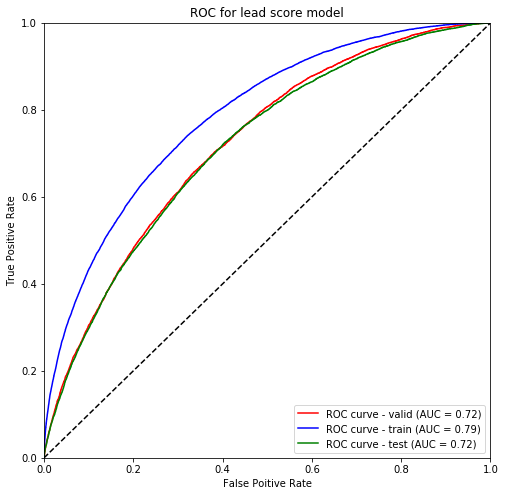

In [420]:
draw_ROC(gbm, dtrain, dvalid, dtest, y_train, y_valid, df_test_Y)

### Disstribution of predicted values

In [388]:
y_pred =gbm.predict(dtest)
print(y_pred.max(), y_pred.min(), y_pred.mean())

0.853999 0.00847218 0.172419


### Feature importance

In [389]:
importance = gbm.get_fscore()

In [393]:
# df_importance = pd.DataFrame(importance.items(), columns=['feature', 'fscore'])
df_importance = pd.DataFrame.from_dict(importance, orient='index').reset_index()
df_importance.columns = ['feature', 'fscore']
df_importance

,feature,fscore
0,grade,40
1,intrate,329
2,mthssincelastrecord,206
3,mortacc,133
4,numrevtlbalgt0,167
5,mthssincelastmajorderog,226
6,numbctl,127
7,homeownership_MORTGAGE,60
8,accopenpast24mths,277
9,numactvbctl,125


In [395]:
df_importance['fscore'] = df_importance['fscore'] / df_importance['fscore'].sum()

In [397]:
df_importance.sort_values(['fscore'], ascending=False, inplace=True)
df_importance

,feature,fscore
32,dti,0.039201
36,mosinoldilacct,0.035419
31,emptitle_freq,0.033876
12,installment,0.030326
16,revolutil,0.028166
55,bcutil,0.027934
13,avgcurbal,0.027934
47,mosinoldrevtlop,0.027703
45,zipcode,0.027394
63,annualinc,0.026700


<Figure size 2304x2304 with 0 Axes>

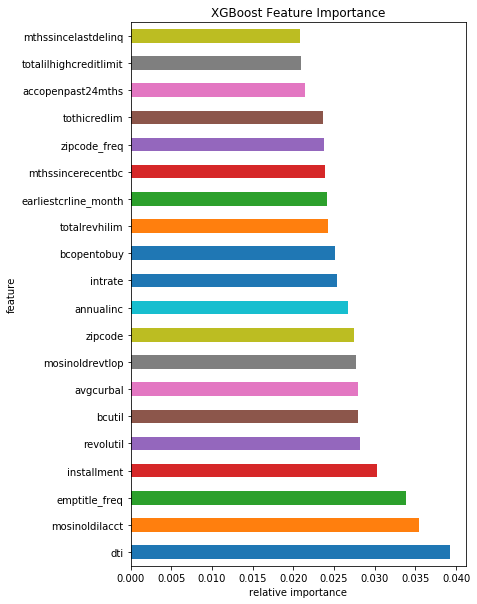

In [398]:
plt.figure(figsize=(32,32))

df_importance[:20].plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')

In [399]:
grade_importance = df_importance.query("feature=='grade'")
grade_importance

,feature,fscore
0,grade,0.003087


In [400]:
subgrade_importance = df_importance.query("feature=='subgrade'")
subgrade_importance

,feature,fscore
25,subgrade,0.010417


In [401]:
intrate_importance = df_importance.query("feature=='intrate'")
intrate_importance

,feature,fscore
1,intrate,0.025388


In [402]:
df_importance.query("feature=='loanamnt'")

,feature,fscore
59,loanamnt,0.003241


Text(0.5,0,'relative importance')

<Figure size 2880x5760 with 0 Axes>

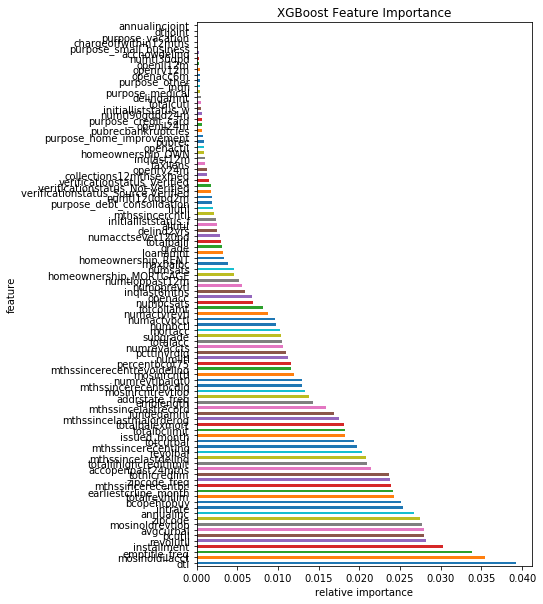

In [407]:
plt.figure(figsize=(40, 80))

df_importance.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6,10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')

## Hyperparameter Tuning - Bayesian Optimization

In [414]:
! pip install bayesian-optimization

In [417]:
from bayes_opt import BayesianOptimization

xgtrain = xgb.DMatrix(df_train_X, label=df_train_Y, missing = np.NAN)

def xgb_evaluate(min_child_weight,
                 colsample_bytree,
                 max_depth,
                 subsample,
                 gamma):
    params = dict()
    params['objective'] = 'binary:logistic'
    params['eta'] = 0.05
    params['max_depth'] = int(max_depth)
    params['min_child_weight'] = int(min_child_weight)
    params['colsample_bytree'] = colsample_bytree
    params['subsample'] = subsample
    params['gamma'] = gamma
    params['verbose_eval'] = False
    
    cv_result = xgb.cv(params, xgtrain,
                      num_boost_round=100000,
                      nfold=3,
                      metrics={'auc'},
                      seed=1234,
                      callbacks=[xgb.callback.early_stop(50)])
    print(cv_result)
    
    return cv_result['test-auc-mean'].max()

xgb_BO = BayesianOptimization(xgb_evaluate,
                             {'max_depth': (4, 8),
                              'min_child_weight': (0, 20),
                              'colsample_bytree': (0.2, 0.8),
                              'subsample': (0.5, 1),
                              'gamma': (0, 2)    
                             })

xgb_BO.maximize(init_points=5, n_iter=40)

Initialization
---------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   colsample_bytree |     gamma |   max_depth |   min_child_weight |   subsample | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[477]	train-auc:0.781474+0.000973429	test-auc:0.719348+0.00275261

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.685699      0.002786        0.689186       0.001884
1         0.691061      0.003361        0.694813       0.001657
2         0.693692      0.003183        0.698437       0.002177
3         0.695463      0.001896        0.701637       0.004005
4         0.697349      0.003355        0.704570       0.002932
5         0.698330      0.005819        0.706187       0.001051
6         0.700132      0.005518        0.708646       0.000803
7         0.70

Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[226]	train-auc:0.808136+0.00160804	test-auc:0.718529+0.0032598

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.687119      0.002578        0.705083       0.002442
1         0.692300      0.002491        0.712537       0.002397
2         0.695678      0.001778        0.716039       0.002538
3         0.697280      0.002470        0.718586       0.001620
4         0.698920      0.002344        0.721448       0.003427
5         0.699861      0.002921        0.723631       0.004131
6         0.700888      0.002580        0.724712       0.004126
7         0.701632      0.002589        0.725619       0.003577
8         0.702514      0.002744        0.727443       0.004806
9         0.703124      0.002681        0.728157       0.004481
10        0.703283      0.002663        0.728568       0.004231


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[269]	train-auc:0.803269+0.00134342	test-auc:0.719056+0.00371551

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.680646      0.002546        0.694322       0.001311
1         0.690399      0.003708        0.705609       0.001309
2         0.694734      0.003880        0.710993       0.002405
3         0.697747      0.003525        0.715830       0.003620
4         0.698230      0.003627        0.718483       0.004142
5         0.699376      0.004365        0.720172       0.003540
6         0.700796      0.003397        0.721807       0.003722
7         0.701506      0.003973        0.723766       0.002678
8         0.702070      0.004634        0.725567       0.001875
9         0.703209      0.004309        0.727022       0.001490
10        0.703338      0.004570        0.727731       0.000900

C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00011348]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Bayesian Optimization
---------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   colsample_bytree |     gamma |   max_depth |   min_child_weight |   subsample | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[206]	train-auc:0.836959+0.00184941	test-auc:0.716963+0.00298099

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.684847      0.002054        0.698692       0.002543
1         0.691248      0.002561        0.708587       0.001771
2         0.693801      0.002472        0.713869       0.002194
3         0.695808      0.003059        0.717455       0.001876
4         0.697081      0.003108        0.719598       0.001907
5         0.698147      0.003610        0.721603       0.001627
6         0.698748      0.003493        0.723472       0.001584
7       

C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([  2.30652592e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[762]	train-auc:0.775617+0.00115931	test-auc:0.718654+0.00312923

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.657023      0.034706        0.659538       0.033454
1         0.685273      0.004421        0.687564       0.002965
2         0.689324      0.002596        0.692007       0.002703
3         0.691311      0.002503        0.694536       0.004003
4         0.692533      0.003394        0.696863       0.002773
5         0.695025      0.005148        0.699781       0.000377
6         0.696533      0.004959        0.701459       0.000151
7         0.696600      0.004751        0.701765       0.000238
8         0.697268      0.004930        0.702814       0.000946
9         0.698311      0.004770        0.703796       0.000232
10        0.698035      0.004714        0.703656       0.000549

C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -1.90297942e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 48, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00023093]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 46, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[570]	train-auc:0.767209+0.0013105	test-auc:0.719475+0.00326909

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.683677      0.003408        0.684807       0.001736
1         0.687509      0.003694        0.689603       0.001650
2         0.689364      0.003116        0.691884       0.002076
3         0.690956      0.003313        0.693361       0.002283
4         0.691316      0.003147        0.694022       0.002192
5         0.693108      0.002441        0.695996       0.003799
6         0.693865      0.002649        0.696802       0.003242
7         0.694193      0.002738        0.697199       0.003076
8         0.694619      0.002908        0.697724       0.002826
9         0.694914      0.003065        0.698200       0.002542
10        0.695178      0.002917        0.698674       0.002525


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.0001852]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 47, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[463]	train-auc:0.750999+0.00121752	test-auc:0.718166+0.00306942

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.613373      0.004957        0.614742       0.003027
1         0.682559      0.004137        0.683988       0.000932
2         0.686885      0.009272        0.688674       0.005571
3         0.688678      0.008514        0.691661       0.004192
4         0.688647      0.009116        0.692402       0.005061
5         0.689945      0.011658        0.693949       0.007755
6         0.693792      0.006930        0.698180       0.003216
7         0.693941      0.006794        0.698552       0.003156
8         0.694567      0.006082        0.699374       0.003391
9         0.696701      0.004635        0.701410       0.001334
10        0.695927      0.004458        0.700870       0.001371

C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00012318]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[261]	train-auc:0.821018+0.00189892	test-auc:0.717503+0.00300916

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.683913      0.002597        0.697843       0.001607
1         0.690155      0.003011        0.708092       0.001165
2         0.693921      0.003246        0.712787       0.001013
3         0.696558      0.003623        0.715494       0.001202
4         0.698213      0.003176        0.718164       0.001695
5         0.699532      0.003331        0.720702       0.002322
6         0.700382      0.002557        0.722308       0.002577
7         0.701032      0.002482        0.723306       0.002589
8         0.701394      0.002363        0.725141       0.003792
9         0.701895      0.002568        0.726083       0.003720
10        0.702354      0.002645        0.726688       0.003450

[641 rows x 4 columns]
   11 | 12m15s |    0.71969 |             0.7982 |    0.0348 |      4.1624 |            15.9895 |      0.6702 | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[483]	train-auc:0.757984+0.000931516	test-auc:0.718392+0.00271884

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.611477      0.006663        0.614817       0.002203
1         0.680255      0.007243        0.682743       0.002530
2         0.684861      0.009358        0.687727       0.004263
3         0.685286      0.010465        0.688946       0.005243
4         0.686040      0.011203        0.690339       0.006266
5         0.688969      0.012507        0.693800       0.007571
6         0.693340      0.007633        0.698383       0.002916
7         0.693684      0.006834        0.699102       0.002326
8         0.693618      0.006836        0.699396      

C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00012808]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[225]	train-auc:0.800524+0.00142072	test-auc:0.718146+0.00350366

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.682582      0.003344        0.696970       0.000611
1         0.691074      0.004617        0.709101       0.000289
2         0.695081      0.004110        0.713927       0.000600
3         0.697678      0.004047        0.717086       0.000307
4         0.698898      0.003983        0.718736       0.000446
5         0.700335      0.003706        0.721251       0.001653
6         0.701137      0.003627        0.722842       0.001612
7         0.701785      0.003753        0.723837       0.001682
8         0.702375      0.003456        0.724591       0.001568
9         0.702845      0.003430        0.725398       0.001364
10        0.703434      0.003507        0.726186       0.001432

[291 rows x 4 columns]
   14 | 04m47s |    0.71699 |             0.2203 |    1.9510 |      7.9536 |             0.0126 |      0.5627 | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[660]	train-auc:0.777497+0.000283201	test-auc:0.718744+0.0027814

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.682511      0.001755        0.685627       0.002275
1         0.685149      0.002007        0.688115       0.002196
2         0.687964      0.001622        0.691144       0.002939
3         0.689940      0.002616        0.693125       0.002133
4         0.690659      0.002669        0.693680       0.002250
5         0.690992      0.002912        0.694328       0.002100
6         0.691620      0.002701        0.694945       0.002064
7         0.692369      0.003191        0.695678       0.001494
8         0.692836      0.003157        0.696256       

C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00058103]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -2.59983790e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 57, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[490]	train-auc:0.759869+0.00113139	test-auc:0.719082+0.00339115

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.683025      0.004032        0.684110       0.001331
1         0.687586      0.005179        0.689652       0.000081
2         0.689559      0.003961        0.692196       0.001210
3         0.691222      0.004074        0.693572       0.001167
4         0.692554      0.003090        0.695360       0.002315
5         0.693380      0.002702        0.696488       0.003203
6         0.694089      0.002714        0.697251       0.003334
7         0.694764      0.002843        0.697920       0.003119
8         0.695522      0.002925        0.698978       0.003806
9         0.696037      0.002883        0.699615       0.003627
10        0.696281      0.002962        0.699867       0.003388

C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00010897]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 55, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[823]	train-auc:0.776613+0.000676809	test-auc:0.719192+0.00292561

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.682814      0.002339        0.684159       0.002360
1         0.687681      0.003126        0.689353       0.002078
2         0.690204      0.001630        0.692347       0.003222
3         0.692146      0.000961        0.695117       0.004890
4         0.694723      0.001550        0.698142       0.003556
5         0.695861      0.004162        0.699645       0.001111
6         0.697767      0.004200        0.702034       0.000773
7         0.697774      0.004375        0.702472       0.000285
8         0.698316      0.004601        0.703568       0.000964
9         0.699144      0.004085        0.704346       0.000484
10        0.698487      0.003912        0.704111       0.00048

[503 rows x 4 columns]
   18 | 04m51s |    0.71860 |             0.2268 |    0.0190 |      4.8027 |            17.7275 |      0.5212 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -8.84203037e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 54, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[287]	train-auc:0.800957+0.00156982	test-auc:0.718342+0.00291458

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.681414      0.003226        0.692832       0.001982
1         0.691580      0.003443        0.703890       0.001877
2         0.695111      0.004035        0.708824       0.002328
3         0.697524      0.003236        0.713550       0.003871
4         0.698215      0.003283        0.715688       0.004128
5         0.700045      0.004807        0.718993       0.001878
6         0.701563      0.004622        0.721449       0.001538
7         0.701722      0.004761        0.722667       0.001283
8         0.702139      0.004871        0.724056       0.000397
9         0.703308      0.004106        0.725312       0.001137
10        0.703510      0.004041        0.725803       0.001267

C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -3.97664662e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 54, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[418]	train-auc:0.78954+0.000634141	test-auc:0.718948+0.00363149

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.684932      0.002562        0.688910       0.001969
1         0.690665      0.004009        0.696282       0.000848
2         0.693268      0.003944        0.699494       0.001202
3         0.694634      0.003797        0.700772       0.001227
4         0.695190      0.003711        0.701785       0.001460
5         0.696093      0.003388        0.702725       0.001833
6         0.696762      0.003595        0.703614       0.001624
7         0.697162      0.003789        0.704337       0.001359
8         0.697696      0.003903        0.704833       0.001088
9         0.697983      0.003969        0.705527       0.000896
10        0.698371      0.003828        0.705935       0.000969

C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00020341]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 55, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[347]	train-auc:0.845415+0.00104147	test-auc:0.718086+0.00279831

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.624816      0.008583        0.645098       0.007476
1         0.680992      0.005025        0.703091       0.003073
2         0.688130      0.010687        0.710827       0.003072
3         0.688300      0.012179        0.713846       0.003948
4         0.689325      0.012243        0.717203       0.004996
5         0.692052      0.013510        0.720773       0.006034
6         0.696386      0.007618        0.725884       0.002884
7         0.696261      0.007278        0.727534       0.002826
8         0.696526      0.007230        0.729873       0.002971
9         0.696567      0.008149        0.731450       0.002136
10        0.697012      0.007804        0.732048       0.002200

Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[287]	train-auc:0.785299+0.00189139	test-auc:0.718945+0.00315069

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.686415      0.004477        0.695638       0.001650
1         0.693824      0.004270        0.703510       0.001494
2         0.696202      0.003842        0.706903       0.001542
3         0.697428      0.004045        0.708350       0.001187
4         0.698682      0.003889        0.710676       0.002659
5         0.699526      0.003875        0.712064       0.003217
6         0.700763      0.003599        0.713333       0.003250
7         0.701149      0.003572        0.714027       0.003039
8         0.701581      0.003677        0.714632       0.003011
9         0.701825      0.003674        0.715283       0.002938
10        0.702023      0.003633        0.715721       0.002825

C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -9.07322010e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 54, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[439]	train-auc:0.77498+0.00128101	test-auc:0.718362+0.00329422

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.616694      0.008120        0.622758       0.005069
1         0.680770      0.005823        0.686559       0.002486
2         0.686900      0.009635        0.692895       0.004676
3         0.687545      0.011271        0.695413       0.005089
4         0.688180      0.012644        0.696927       0.006040
5         0.690923      0.013656        0.700077       0.007437
6         0.695255      0.008528        0.704645       0.002979
7         0.694996      0.008096        0.705372       0.003037
8         0.695179      0.008139        0.706074       0.003786
9         0.697549      0.006828        0.708125       0.002390
10        0.696993      0.006355        0.707874       0.002280


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.0002493]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 55, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[785]	train-auc:0.779816+0.0013213	test-auc:0.719949+0.00297444

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.682520      0.001753        0.685791       0.002327
1         0.685790      0.002906        0.688703       0.001430
2         0.687227      0.002123        0.690155       0.002371
3         0.689931      0.002523        0.692780       0.002023
4         0.690694      0.002372        0.693824       0.002485
5         0.692377      0.001891        0.695472       0.003851
6         0.693051      0.002363        0.696167       0.003211
7         0.693479      0.002649        0.696740       0.002781
8         0.694050      0.002651        0.697233       0.002694
9         0.694246      0.002689        0.697460       0.002488
10        0.694538      0.002896        0.697905       0.002233


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[406]	train-auc:0.780011+0.000847995	test-auc:0.718739+0.003044

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.685583      0.003565        0.688628       0.002406
1         0.690014      0.004052        0.694349       0.001830
2         0.693265      0.003107        0.698355       0.002504
3         0.695164      0.001543        0.701648       0.004647
4         0.697163      0.002857        0.704724       0.003219
5         0.698381      0.005136        0.706354       0.000965
6         0.699912      0.004832        0.708550       0.000584
7         0.699631      0.004824        0.708732       0.000199
8         0.700397      0.005162        0.710303       0.000748
9         0.701213      0.004526        0.711143       0.000166
10        0.700953      0.004300        0.711200       0.000538


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00203741]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 58, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[654]	train-auc:0.773956+0.000929114	test-auc:0.71967+0.00311395

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.682766      0.001735        0.685863       0.002410
1         0.685911      0.002849        0.688786       0.001536
2         0.687569      0.001776        0.690297       0.002606
3         0.689995      0.002423        0.692895       0.002234
4         0.690916      0.002201        0.694003       0.002582
5         0.691331      0.002453        0.694412       0.002351
6         0.692275      0.002919        0.695300       0.001917
7         0.692743      0.003472        0.695826       0.001370
8         0.693216      0.003685        0.696284       0.001306
9         0.693490      0.003559        0.696629       0.001397
10        0.693800      0.003409        0.696981       0.001388

Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[432]	train-auc:0.792707+0.00184042	test-auc:0.718747+0.00310303

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.618800      0.006625        0.629223       0.006344
1         0.679295      0.004852        0.689994       0.003217
2         0.687530      0.010510        0.697357       0.004454
3         0.688296      0.012033        0.699291       0.005983
4         0.688990      0.012890        0.701494       0.006891
5         0.691467      0.014388        0.705004       0.008424
6         0.695629      0.008466        0.709688       0.003601
7         0.695526      0.007804        0.710494       0.003611
8         0.695917      0.007923        0.711923       0.003929
9         0.698645      0.006173        0.714314       0.002349
10        0.698332      0.005901        0.714331       0.002116

Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[715]	train-auc:0.773232+0.000849361	test-auc:0.719522+0.0035098

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.683523      0.003986        0.684894       0.001849
1         0.687009      0.004960        0.689205       0.000840
2         0.689354      0.003659        0.691723       0.001522
3         0.691175      0.003355        0.693545       0.001826
4         0.691750      0.003328        0.694378       0.001909
5         0.692380      0.003243        0.695155       0.002312
6         0.693027      0.003550        0.695844       0.002071
7         0.693493      0.003671        0.696428       0.001742
8         0.693910      0.003898        0.696964       0.001491
9         0.694417      0.003906        0.697559       0.001224
10        0.694766      0.003766        0.697890       0.001373

   34 | 06m43s |    0.71882 |             0.2894 |    0.0105 |      4.4492 |            14.5647 |      0.5280 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.00162211]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00585424]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[268]	train-auc:0.818342+0.00105744	test-auc:0.71666+0.00349399

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.619237      0.007450        0.636541       0.006868
1         0.676526      0.005673        0.694960       0.003153
2         0.684597      0.012108        0.704467       0.003866
3         0.685474      0.013267        0.708555       0.004151
4         0.686044      0.014236        0.711175       0.005013
5         0.689092      0.014455        0.715296       0.006846
6         0.693500      0.008886        0.720561       0.002815
7         0.693535      0.008352        0.721898       0.003038
8         0.694180      0.008424        0.724477       0.003236
9         0.697228      0.006569        0.727285       0.002012
10        0.697303      0.006130        0.727620       0.001488


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[527]	train-auc:0.766102+0.00111342	test-auc:0.719473+0.00329605

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.683327      0.004118        0.684824       0.001595
1         0.687238      0.004862        0.689578       0.000543
2         0.689188      0.004473        0.691862       0.001076
3         0.690843      0.004092        0.693343       0.001289
4         0.691353      0.003748        0.693932       0.001506
5         0.693052      0.002984        0.695947       0.002990
6         0.694037      0.003127        0.696904       0.003050
7         0.694303      0.003364        0.697430       0.002792
8         0.694675      0.003516        0.697828       0.002505
9         0.694995      0.003763        0.698149       0.002314
10        0.695292      0.003866        0.698425       0.002112

C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00086798]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 56, 'nit': 8, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[334]	train-auc:0.83222+0.00135064	test-auc:0.718799+0.00330062

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.625648      0.008413        0.645836       0.006712
1         0.683093      0.006516        0.703220       0.002171
2         0.689762      0.010029        0.710785       0.003344
3         0.689636      0.012118        0.713694       0.004809
4         0.690468      0.012332        0.717212       0.005402
5         0.693160      0.013814        0.720660       0.006719
6         0.697422      0.008235        0.725586       0.003088
7         0.697235      0.007846        0.727071       0.003264
8         0.697757      0.007650        0.729692       0.003359
9         0.700456      0.006052        0.732117       0.001797
10        0.700391      0.005497        0.732306       0.001333


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([  1.16298907e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00010471]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 64, 'nit': 8, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[347]	train-auc:0.788192+0.00135996	test-auc:0.718866+0.00304367

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.625168      0.004290        0.636094       0.002437
1         0.685135      0.005127        0.695574       0.001885
2         0.691624      0.010305        0.702105       0.004342
3         0.693140      0.009665        0.706009       0.002766
4         0.693220      0.010161        0.707544       0.003417
5         0.694575      0.012247        0.709189       0.005908
6         0.698013      0.007263        0.712888       0.002301
7         0.697917      0.007082        0.713162       0.002130
8         0.698274      0.007189        0.714459       0.002649
9         0.700508      0.005894        0.716788       0.000988
10        0.700448      0.005363        0.716675       0.000638

Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[650]	train-auc:0.773003+0.000438697	test-auc:0.719014+0.00331157

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.682480      0.001783        0.685654       0.002271
1         0.685532      0.002132        0.688227       0.002132
2         0.688051      0.000888        0.690833       0.003307
3         0.689896      0.002226        0.692984       0.002507
4         0.690490      0.002310        0.693454       0.002404
5         0.691914      0.002262        0.695365       0.003842
6         0.692625      0.002358        0.696038       0.003428
7         0.693410      0.002577        0.696707       0.002914
8         0.693760      0.002477        0.697055       0.002667
9         0.693934      0.002442        0.697265       0.002491
10        0.694207      0.002461        0.697694       0.00230

C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00017857]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 59, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([  4.15301245e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[355]	train-auc:0.82745+0.000428648	test-auc:0.718777+0.00276806

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.625751      0.007947        0.644557       0.006643
1         0.681416      0.005560        0.700689       0.002004
2         0.688847      0.011018        0.707634       0.003942
3         0.688968      0.012983        0.710337       0.004979
4         0.690049      0.013496        0.713571       0.005728
5         0.692721      0.014546        0.717142       0.006840
6         0.697056      0.008529        0.722084       0.003239
7         0.697111      0.008087        0.723324       0.003289
8         0.697271      0.007778        0.725637       0.003316
9         0.697137      0.008613        0.726957       0.002754
10        0.697721      0.008266        0.727431       0.002735

C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00122927]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 54, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[581]	train-auc:0.764796+0.00131183	test-auc:0.719659+0.00358795

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.683081      0.004165        0.684142       0.001351
1         0.687209      0.005197        0.689284       0.000421
2         0.689672      0.004774        0.692084       0.000459
3         0.691248      0.004675        0.693739       0.000505
4         0.691811      0.004504        0.694255       0.000585
5         0.693684      0.003396        0.696341       0.002342
6         0.694259      0.003322        0.697006       0.002420
7         0.694526      0.003360        0.697518       0.002224
8         0.694916      0.003325        0.697905       0.002223
9         0.695156      0.003395        0.698188       0.002156
10        0.695431      0.003254        0.698452       0.002194

In [418]:
## Tuning results
xgb_BO_scores = pd.DataFrame(xgb_BO.res['all']['params'])
xgb_BO_scores['score'] = pd.DataFrame(xgb_BO.res['all']['values'])
xgb_BO_scores = xgb_BO_scores.sort_values(by='score', ascending=False)
xgb_BO_scores.head(3)

,colsample_bytree,gamma,max_depth,min_child_weight,subsample,score
19,0.777429,1.898901,4.139576,16.196390,0.905414,0.719949
20,0.773430,0.982940,4.052071,14.050195,0.929524,0.719780
22,0.799885,1.092120,4.108262,16.728993,0.516179,0.719757


### Validation with smaller learning rate

In [422]:
%%time
# parameter set 1
params = {
    'objective': 'binary:logistic',
    'boster': 'gbtree',
    'eta': 0.01, # smaller learning rate
    'max_depth': 4,
    'min_child_weight': 16,
    'subsample': 0.905414,
    'colsample_bytree': 0.777429,
    'gamma': 1.898901,
    'seed': 1234,
    'nthread': -1,
    'silence': 1,
    'eval_metric': 'auc',
    'scale_pos_weight': 1
}

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
num_boost_round=10000
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=50)

# [3191] train-auc: 0.76878, eval-auc: 0.724253

[0]	train-auc:0.684273	eval-auc:0.685245
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 50 rounds.
[1]	train-auc:0.687744	eval-auc:0.688154
[2]	train-auc:0.689357	eval-auc:0.690102
[3]	train-auc:0.689721	eval-auc:0.690777
[4]	train-auc:0.690354	eval-auc:0.690978
[5]	train-auc:0.691049	eval-auc:0.691616
[6]	train-auc:0.692173	eval-auc:0.693157
[7]	train-auc:0.692244	eval-auc:0.693222
[8]	train-auc:0.692045	eval-auc:0.692861
[9]	train-auc:0.691945	eval-auc:0.69271
[10]	train-auc:0.692267	eval-auc:0.693218
[11]	train-auc:0.692331	eval-auc:0.693434
[12]	train-auc:0.692789	eval-auc:0.694012
[13]	train-auc:0.692877	eval-auc:0.694058
[14]	train-auc:0.693008	eval-auc:0.694145
[15]	train-auc:0.692924	eval-auc:0.694119
[16]	train-auc:0.693277	eval-auc:0.694437
[17]	train-auc:0.693773	eval-auc:0.69494
[18]	train-auc:0.693992	eval-auc:0.695313
[19]	train-auc:0.694183	eval-auc:0.695467
[20]	train-auc:0.694149	eval-au

[191]	train-auc:0.704274	eval-auc:0.703724
[192]	train-auc:0.704312	eval-auc:0.703767
[193]	train-auc:0.704357	eval-auc:0.703803
[194]	train-auc:0.704409	eval-auc:0.703838
[195]	train-auc:0.704455	eval-auc:0.703864
[196]	train-auc:0.704493	eval-auc:0.703891
[197]	train-auc:0.704542	eval-auc:0.703912
[198]	train-auc:0.704581	eval-auc:0.703956
[199]	train-auc:0.704617	eval-auc:0.703976
[200]	train-auc:0.704654	eval-auc:0.703993
[201]	train-auc:0.704721	eval-auc:0.704057
[202]	train-auc:0.704768	eval-auc:0.704085
[203]	train-auc:0.704829	eval-auc:0.704134
[204]	train-auc:0.704862	eval-auc:0.704139
[205]	train-auc:0.704935	eval-auc:0.704197
[206]	train-auc:0.704985	eval-auc:0.704242
[207]	train-auc:0.705025	eval-auc:0.704265
[208]	train-auc:0.705088	eval-auc:0.704313
[209]	train-auc:0.705157	eval-auc:0.704367
[210]	train-auc:0.705195	eval-auc:0.704381
[211]	train-auc:0.705251	eval-auc:0.7044
[212]	train-auc:0.705309	eval-auc:0.704425
[213]	train-auc:0.705353	eval-auc:0.704462
[214]	train-a

[383]	train-auc:0.714955	eval-auc:0.710605
[384]	train-auc:0.715011	eval-auc:0.710631
[385]	train-auc:0.715064	eval-auc:0.710667
[386]	train-auc:0.715113	eval-auc:0.710704
[387]	train-auc:0.715174	eval-auc:0.71075
[388]	train-auc:0.71522	eval-auc:0.710783
[389]	train-auc:0.715259	eval-auc:0.71081
[390]	train-auc:0.715294	eval-auc:0.710823
[391]	train-auc:0.715361	eval-auc:0.710873
[392]	train-auc:0.715413	eval-auc:0.710905
[393]	train-auc:0.715451	eval-auc:0.710927
[394]	train-auc:0.715491	eval-auc:0.710943
[395]	train-auc:0.71554	eval-auc:0.710974
[396]	train-auc:0.715586	eval-auc:0.710997
[397]	train-auc:0.715655	eval-auc:0.711038
[398]	train-auc:0.715698	eval-auc:0.711048
[399]	train-auc:0.715741	eval-auc:0.711059
[400]	train-auc:0.715796	eval-auc:0.71108
[401]	train-auc:0.715854	eval-auc:0.711116
[402]	train-auc:0.715913	eval-auc:0.711145
[403]	train-auc:0.715967	eval-auc:0.711169
[404]	train-auc:0.716022	eval-auc:0.711207
[405]	train-auc:0.716066	eval-auc:0.711226
[406]	train-auc:

[575]	train-auc:0.723457	eval-auc:0.714878
[576]	train-auc:0.723498	eval-auc:0.714898
[577]	train-auc:0.723527	eval-auc:0.714903
[578]	train-auc:0.723564	eval-auc:0.714921
[579]	train-auc:0.723602	eval-auc:0.714953
[580]	train-auc:0.723635	eval-auc:0.714971
[581]	train-auc:0.723664	eval-auc:0.714992
[582]	train-auc:0.723702	eval-auc:0.715017
[583]	train-auc:0.723746	eval-auc:0.715035
[584]	train-auc:0.723782	eval-auc:0.715061
[585]	train-auc:0.723823	eval-auc:0.715076
[586]	train-auc:0.723854	eval-auc:0.71509
[587]	train-auc:0.723887	eval-auc:0.715105
[588]	train-auc:0.723913	eval-auc:0.715117
[589]	train-auc:0.723952	eval-auc:0.715136
[590]	train-auc:0.723984	eval-auc:0.715156
[591]	train-auc:0.724022	eval-auc:0.715168
[592]	train-auc:0.724051	eval-auc:0.71518
[593]	train-auc:0.724089	eval-auc:0.715203
[594]	train-auc:0.724123	eval-auc:0.715216
[595]	train-auc:0.724157	eval-auc:0.715225
[596]	train-auc:0.724177	eval-auc:0.71524
[597]	train-auc:0.724219	eval-auc:0.715258
[598]	train-au

[767]	train-auc:0.729178	eval-auc:0.717555
[768]	train-auc:0.729204	eval-auc:0.717567
[769]	train-auc:0.72923	eval-auc:0.717572
[770]	train-auc:0.729264	eval-auc:0.717583
[771]	train-auc:0.72929	eval-auc:0.717592
[772]	train-auc:0.729339	eval-auc:0.717626
[773]	train-auc:0.729357	eval-auc:0.71763
[774]	train-auc:0.729393	eval-auc:0.717653
[775]	train-auc:0.729406	eval-auc:0.717664
[776]	train-auc:0.729431	eval-auc:0.717674
[777]	train-auc:0.729452	eval-auc:0.717683
[778]	train-auc:0.729468	eval-auc:0.717694
[779]	train-auc:0.729495	eval-auc:0.717712
[780]	train-auc:0.729522	eval-auc:0.717717
[781]	train-auc:0.729536	eval-auc:0.717721
[782]	train-auc:0.729568	eval-auc:0.717752
[783]	train-auc:0.729588	eval-auc:0.717759
[784]	train-auc:0.729613	eval-auc:0.717767
[785]	train-auc:0.729647	eval-auc:0.717789
[786]	train-auc:0.729687	eval-auc:0.717809
[787]	train-auc:0.729703	eval-auc:0.71782
[788]	train-auc:0.729744	eval-auc:0.717843
[789]	train-auc:0.729763	eval-auc:0.717857
[790]	train-auc

[959]	train-auc:0.733903	eval-auc:0.719511
[960]	train-auc:0.733929	eval-auc:0.719519
[961]	train-auc:0.733944	eval-auc:0.719529
[962]	train-auc:0.733973	eval-auc:0.719536
[963]	train-auc:0.733994	eval-auc:0.719542
[964]	train-auc:0.73402	eval-auc:0.71956
[965]	train-auc:0.734043	eval-auc:0.719568
[966]	train-auc:0.734067	eval-auc:0.719573
[967]	train-auc:0.734092	eval-auc:0.719589
[968]	train-auc:0.734118	eval-auc:0.71959
[969]	train-auc:0.734136	eval-auc:0.719597
[970]	train-auc:0.734143	eval-auc:0.719603
[971]	train-auc:0.734177	eval-auc:0.719621
[972]	train-auc:0.734195	eval-auc:0.719628
[973]	train-auc:0.734225	eval-auc:0.719633
[974]	train-auc:0.734249	eval-auc:0.719639
[975]	train-auc:0.73428	eval-auc:0.71965
[976]	train-auc:0.734299	eval-auc:0.719655
[977]	train-auc:0.734316	eval-auc:0.719653
[978]	train-auc:0.734334	eval-auc:0.71966
[979]	train-auc:0.73436	eval-auc:0.719659
[980]	train-auc:0.734372	eval-auc:0.719664
[981]	train-auc:0.73439	eval-auc:0.719669
[982]	train-auc:0.7

[1148]	train-auc:0.73792	eval-auc:0.720688
[1149]	train-auc:0.737952	eval-auc:0.720692
[1150]	train-auc:0.737981	eval-auc:0.720696
[1151]	train-auc:0.737995	eval-auc:0.720698
[1152]	train-auc:0.738018	eval-auc:0.720705
[1153]	train-auc:0.738035	eval-auc:0.720715
[1154]	train-auc:0.738064	eval-auc:0.720731
[1155]	train-auc:0.738084	eval-auc:0.720733
[1156]	train-auc:0.738104	eval-auc:0.720742
[1157]	train-auc:0.738133	eval-auc:0.720749
[1158]	train-auc:0.738157	eval-auc:0.720756
[1159]	train-auc:0.738177	eval-auc:0.720759
[1160]	train-auc:0.738197	eval-auc:0.720763
[1161]	train-auc:0.738208	eval-auc:0.720762
[1162]	train-auc:0.738225	eval-auc:0.720761
[1163]	train-auc:0.738248	eval-auc:0.720767
[1164]	train-auc:0.738261	eval-auc:0.720769
[1165]	train-auc:0.738284	eval-auc:0.720766
[1166]	train-auc:0.738303	eval-auc:0.720774
[1167]	train-auc:0.738313	eval-auc:0.720774
[1168]	train-auc:0.738325	eval-auc:0.720782
[1169]	train-auc:0.738332	eval-auc:0.720778
[1170]	train-auc:0.738362	eval-au

[1335]	train-auc:0.741507	eval-auc:0.721495
[1336]	train-auc:0.741525	eval-auc:0.721495
[1337]	train-auc:0.741536	eval-auc:0.721497
[1338]	train-auc:0.741549	eval-auc:0.721495
[1339]	train-auc:0.741575	eval-auc:0.721498
[1340]	train-auc:0.7416	eval-auc:0.721498
[1341]	train-auc:0.741612	eval-auc:0.721499
[1342]	train-auc:0.741639	eval-auc:0.721509
[1343]	train-auc:0.741662	eval-auc:0.72151
[1344]	train-auc:0.741698	eval-auc:0.72152
[1345]	train-auc:0.741707	eval-auc:0.721523
[1346]	train-auc:0.741718	eval-auc:0.721524
[1347]	train-auc:0.741733	eval-auc:0.72152
[1348]	train-auc:0.741752	eval-auc:0.721523
[1349]	train-auc:0.741788	eval-auc:0.721533
[1350]	train-auc:0.741804	eval-auc:0.721534
[1351]	train-auc:0.741817	eval-auc:0.721535
[1352]	train-auc:0.741849	eval-auc:0.721546
[1353]	train-auc:0.741879	eval-auc:0.721554
[1354]	train-auc:0.741906	eval-auc:0.721566
[1355]	train-auc:0.741935	eval-auc:0.721573
[1356]	train-auc:0.741952	eval-auc:0.72158
[1357]	train-auc:0.741976	eval-auc:0.7

[1523]	train-auc:0.744893	eval-auc:0.722201
[1524]	train-auc:0.744917	eval-auc:0.722205
[1525]	train-auc:0.744923	eval-auc:0.722207
[1526]	train-auc:0.744936	eval-auc:0.722211
[1527]	train-auc:0.744953	eval-auc:0.72221
[1528]	train-auc:0.74497	eval-auc:0.722202
[1529]	train-auc:0.745004	eval-auc:0.722215
[1530]	train-auc:0.745018	eval-auc:0.722207
[1531]	train-auc:0.745037	eval-auc:0.722208
[1532]	train-auc:0.745058	eval-auc:0.722215
[1533]	train-auc:0.745072	eval-auc:0.722219
[1534]	train-auc:0.745086	eval-auc:0.72222
[1535]	train-auc:0.745094	eval-auc:0.722228
[1536]	train-auc:0.745113	eval-auc:0.72223
[1537]	train-auc:0.745123	eval-auc:0.722225
[1538]	train-auc:0.745135	eval-auc:0.722227
[1539]	train-auc:0.745147	eval-auc:0.722231
[1540]	train-auc:0.745172	eval-auc:0.72224
[1541]	train-auc:0.745194	eval-auc:0.722245
[1542]	train-auc:0.745201	eval-auc:0.722246
[1543]	train-auc:0.745214	eval-auc:0.722248
[1544]	train-auc:0.745244	eval-auc:0.722253
[1545]	train-auc:0.745255	eval-auc:0.

[1711]	train-auc:0.748181	eval-auc:0.7227
[1712]	train-auc:0.748196	eval-auc:0.7227
[1713]	train-auc:0.74821	eval-auc:0.722701
[1714]	train-auc:0.748216	eval-auc:0.722702
[1715]	train-auc:0.748224	eval-auc:0.722706
[1716]	train-auc:0.748249	eval-auc:0.722713
[1717]	train-auc:0.748255	eval-auc:0.722713
[1718]	train-auc:0.748265	eval-auc:0.722718
[1719]	train-auc:0.748275	eval-auc:0.722721
[1720]	train-auc:0.748289	eval-auc:0.72272
[1721]	train-auc:0.748297	eval-auc:0.722717
[1722]	train-auc:0.748317	eval-auc:0.722716
[1723]	train-auc:0.74834	eval-auc:0.722716
[1724]	train-auc:0.748358	eval-auc:0.722715
[1725]	train-auc:0.748371	eval-auc:0.722716
[1726]	train-auc:0.748387	eval-auc:0.72271
[1727]	train-auc:0.74841	eval-auc:0.72272
[1728]	train-auc:0.748425	eval-auc:0.722722
[1729]	train-auc:0.748433	eval-auc:0.722725
[1730]	train-auc:0.748441	eval-auc:0.722729
[1731]	train-auc:0.748451	eval-auc:0.722734
[1732]	train-auc:0.748484	eval-auc:0.722736
[1733]	train-auc:0.7485	eval-auc:0.722733


[1899]	train-auc:0.751093	eval-auc:0.722984
[1900]	train-auc:0.75112	eval-auc:0.722988
[1901]	train-auc:0.751134	eval-auc:0.722984
[1902]	train-auc:0.751153	eval-auc:0.722978
[1903]	train-auc:0.751171	eval-auc:0.72298
[1904]	train-auc:0.751192	eval-auc:0.722984
[1905]	train-auc:0.751203	eval-auc:0.72299
[1906]	train-auc:0.751223	eval-auc:0.722997
[1907]	train-auc:0.751249	eval-auc:0.723002
[1908]	train-auc:0.751252	eval-auc:0.723001
[1909]	train-auc:0.751272	eval-auc:0.723007
[1910]	train-auc:0.75128	eval-auc:0.723009
[1911]	train-auc:0.751291	eval-auc:0.72301
[1912]	train-auc:0.751318	eval-auc:0.72301
[1913]	train-auc:0.751343	eval-auc:0.723018
[1914]	train-auc:0.751354	eval-auc:0.723015
[1915]	train-auc:0.751378	eval-auc:0.723012
[1916]	train-auc:0.7514	eval-auc:0.723012
[1917]	train-auc:0.751419	eval-auc:0.723017
[1918]	train-auc:0.751435	eval-auc:0.723021
[1919]	train-auc:0.751445	eval-auc:0.723018
[1920]	train-auc:0.751459	eval-auc:0.723018
[1921]	train-auc:0.751485	eval-auc:0.723

[2087]	train-auc:0.754069	eval-auc:0.723267
[2088]	train-auc:0.754085	eval-auc:0.723272
[2089]	train-auc:0.754101	eval-auc:0.72327
[2090]	train-auc:0.754119	eval-auc:0.72327
[2091]	train-auc:0.754129	eval-auc:0.723271
[2092]	train-auc:0.754152	eval-auc:0.723269
[2093]	train-auc:0.75416	eval-auc:0.723267
[2094]	train-auc:0.75417	eval-auc:0.723263
[2095]	train-auc:0.754185	eval-auc:0.723268
[2096]	train-auc:0.754204	eval-auc:0.723272
[2097]	train-auc:0.75422	eval-auc:0.723274
[2098]	train-auc:0.75424	eval-auc:0.723274
[2099]	train-auc:0.754258	eval-auc:0.723282
[2100]	train-auc:0.754275	eval-auc:0.723283
[2101]	train-auc:0.754283	eval-auc:0.723285
[2102]	train-auc:0.754291	eval-auc:0.723288
[2103]	train-auc:0.754311	eval-auc:0.723296
[2104]	train-auc:0.754317	eval-auc:0.723296
[2105]	train-auc:0.754342	eval-auc:0.723306
[2106]	train-auc:0.754366	eval-auc:0.723313
[2107]	train-auc:0.754387	eval-auc:0.723326
[2108]	train-auc:0.754404	eval-auc:0.723324
[2109]	train-auc:0.754413	eval-auc:0.7

[2274]	train-auc:0.756812	eval-auc:0.723474
[2275]	train-auc:0.756829	eval-auc:0.723472
[2276]	train-auc:0.756838	eval-auc:0.723476
[2277]	train-auc:0.756853	eval-auc:0.723477
[2278]	train-auc:0.756859	eval-auc:0.723478
[2279]	train-auc:0.756872	eval-auc:0.723478
[2280]	train-auc:0.75689	eval-auc:0.723477
[2281]	train-auc:0.756893	eval-auc:0.723474
[2282]	train-auc:0.756909	eval-auc:0.723472
[2283]	train-auc:0.756926	eval-auc:0.723471
[2284]	train-auc:0.756936	eval-auc:0.723471
[2285]	train-auc:0.756948	eval-auc:0.723466
[2286]	train-auc:0.756971	eval-auc:0.72348
[2287]	train-auc:0.75698	eval-auc:0.723475
[2288]	train-auc:0.756999	eval-auc:0.723478
[2289]	train-auc:0.757012	eval-auc:0.72348
[2290]	train-auc:0.757025	eval-auc:0.723491
[2291]	train-auc:0.757043	eval-auc:0.723495
[2292]	train-auc:0.757057	eval-auc:0.723492
[2293]	train-auc:0.757066	eval-auc:0.723494
[2294]	train-auc:0.757075	eval-auc:0.723496
[2295]	train-auc:0.757085	eval-auc:0.723498
[2296]	train-auc:0.757094	eval-auc:0

[2462]	train-auc:0.759328	eval-auc:0.723648
[2463]	train-auc:0.759345	eval-auc:0.723648
[2464]	train-auc:0.75937	eval-auc:0.723652
[2465]	train-auc:0.759384	eval-auc:0.723657
[2466]	train-auc:0.7594	eval-auc:0.723668
[2467]	train-auc:0.759413	eval-auc:0.723666
[2468]	train-auc:0.759431	eval-auc:0.723666
[2469]	train-auc:0.759439	eval-auc:0.723666
[2470]	train-auc:0.759462	eval-auc:0.723674
[2471]	train-auc:0.759476	eval-auc:0.723679
[2472]	train-auc:0.759478	eval-auc:0.723678
[2473]	train-auc:0.759491	eval-auc:0.723673
[2474]	train-auc:0.759514	eval-auc:0.723672
[2475]	train-auc:0.759543	eval-auc:0.723677
[2476]	train-auc:0.759557	eval-auc:0.723682
[2477]	train-auc:0.759563	eval-auc:0.723684
[2478]	train-auc:0.759578	eval-auc:0.723685
[2479]	train-auc:0.759581	eval-auc:0.723685
[2480]	train-auc:0.759595	eval-auc:0.723689
[2481]	train-auc:0.759613	eval-auc:0.723686
[2482]	train-auc:0.759623	eval-auc:0.723682
[2483]	train-auc:0.759636	eval-auc:0.723676
[2484]	train-auc:0.75966	eval-auc:0

[2649]	train-auc:0.761835	eval-auc:0.72379
[2650]	train-auc:0.761862	eval-auc:0.723793
[2651]	train-auc:0.761871	eval-auc:0.723793
[2652]	train-auc:0.761892	eval-auc:0.723791
[2653]	train-auc:0.761904	eval-auc:0.723787
[2654]	train-auc:0.761913	eval-auc:0.723786
[2655]	train-auc:0.761934	eval-auc:0.723794
[2656]	train-auc:0.76194	eval-auc:0.723792
[2657]	train-auc:0.761947	eval-auc:0.723791
[2658]	train-auc:0.76196	eval-auc:0.723798
[2659]	train-auc:0.761985	eval-auc:0.723797
[2660]	train-auc:0.762005	eval-auc:0.7238
[2661]	train-auc:0.762023	eval-auc:0.723799
[2662]	train-auc:0.762042	eval-auc:0.723799
[2663]	train-auc:0.762057	eval-auc:0.723799
[2664]	train-auc:0.762075	eval-auc:0.723799
[2665]	train-auc:0.76209	eval-auc:0.723801
[2666]	train-auc:0.76211	eval-auc:0.723796
[2667]	train-auc:0.76212	eval-auc:0.723792
[2668]	train-auc:0.762143	eval-auc:0.723797
[2669]	train-auc:0.762153	eval-auc:0.723796
[2670]	train-auc:0.762168	eval-auc:0.723791
[2671]	train-auc:0.762175	eval-auc:0.723

[2837]	train-auc:0.764296	eval-auc:0.72397
[2838]	train-auc:0.764305	eval-auc:0.72397
[2839]	train-auc:0.764326	eval-auc:0.723974
[2840]	train-auc:0.764337	eval-auc:0.723979
[2841]	train-auc:0.764359	eval-auc:0.723986
[2842]	train-auc:0.764376	eval-auc:0.723992
[2843]	train-auc:0.764398	eval-auc:0.723992
[2844]	train-auc:0.764413	eval-auc:0.723998
[2845]	train-auc:0.76443	eval-auc:0.724003
[2846]	train-auc:0.764446	eval-auc:0.723998
[2847]	train-auc:0.764459	eval-auc:0.724
[2848]	train-auc:0.764472	eval-auc:0.724
[2849]	train-auc:0.764479	eval-auc:0.723997
[2850]	train-auc:0.764493	eval-auc:0.723997
[2851]	train-auc:0.764497	eval-auc:0.723996
[2852]	train-auc:0.764505	eval-auc:0.723997
[2853]	train-auc:0.764521	eval-auc:0.723998
[2854]	train-auc:0.764533	eval-auc:0.724004
[2855]	train-auc:0.764557	eval-auc:0.724008
[2856]	train-auc:0.76457	eval-auc:0.724001
[2857]	train-auc:0.764581	eval-auc:0.723999
[2858]	train-auc:0.764601	eval-auc:0.724
[2859]	train-auc:0.764624	eval-auc:0.724
[286

[3025]	train-auc:0.766626	eval-auc:0.724129
[3026]	train-auc:0.76663	eval-auc:0.724134
[3027]	train-auc:0.766637	eval-auc:0.724134
[3028]	train-auc:0.766647	eval-auc:0.724134
[3029]	train-auc:0.76665	eval-auc:0.724135
[3030]	train-auc:0.766676	eval-auc:0.724132
[3031]	train-auc:0.766686	eval-auc:0.724134
[3032]	train-auc:0.766704	eval-auc:0.724136
[3033]	train-auc:0.766723	eval-auc:0.724132
[3034]	train-auc:0.766726	eval-auc:0.724133
[3035]	train-auc:0.766734	eval-auc:0.724136
[3036]	train-auc:0.766751	eval-auc:0.724137
[3037]	train-auc:0.766762	eval-auc:0.724142
[3038]	train-auc:0.766774	eval-auc:0.72414
[3039]	train-auc:0.766787	eval-auc:0.724143
[3040]	train-auc:0.766802	eval-auc:0.724144
[3041]	train-auc:0.766811	eval-auc:0.724149
[3042]	train-auc:0.766822	eval-auc:0.724146
[3043]	train-auc:0.766844	eval-auc:0.724144
[3044]	train-auc:0.766851	eval-auc:0.724148
[3045]	train-auc:0.766871	eval-auc:0.724157
[3046]	train-auc:0.766875	eval-auc:0.724158
[3047]	train-auc:0.766885	eval-auc:

[3213]	train-auc:0.769076	eval-auc:0.724234
[3214]	train-auc:0.76909	eval-auc:0.724236
[3215]	train-auc:0.769092	eval-auc:0.724234
[3216]	train-auc:0.769094	eval-auc:0.724232
[3217]	train-auc:0.769099	eval-auc:0.724234
[3218]	train-auc:0.769102	eval-auc:0.724232
[3219]	train-auc:0.769115	eval-auc:0.724229
[3220]	train-auc:0.769138	eval-auc:0.724222
[3221]	train-auc:0.769154	eval-auc:0.724221
[3222]	train-auc:0.769158	eval-auc:0.72422
[3223]	train-auc:0.769177	eval-auc:0.724217
[3224]	train-auc:0.769184	eval-auc:0.724215
[3225]	train-auc:0.769186	eval-auc:0.724215
[3226]	train-auc:0.769203	eval-auc:0.724213
[3227]	train-auc:0.769214	eval-auc:0.72421
[3228]	train-auc:0.769226	eval-auc:0.724208
[3229]	train-auc:0.76923	eval-auc:0.724205
[3230]	train-auc:0.769237	eval-auc:0.724207
[3231]	train-auc:0.769242	eval-auc:0.724206
[3232]	train-auc:0.769247	eval-auc:0.724207
[3233]	train-auc:0.769269	eval-auc:0.724207
[3234]	train-auc:0.769278	eval-auc:0.724201
[3235]	train-auc:0.769286	eval-auc:0

## Retrain model with tuned parameters

In [ ]:
# best_xgb_iteration = 3191
# clf_train = xgb.XGBClassifier(learning_rate = 0.01,
#                              n_estimators = best_xgb_iteration,
#                              max_depth = 4,
#                              min_child_weight = 16,
#                              subsample = 0.905414,
#                              colsample_bytree = 0.777429,
#                              gamma = 1.898901,
#                              seed = 1234,
#                              nthread = -1,
#                              scale_pos_weight = 1)

# clf_train.fit(train_x, train_y)

## validate on test data

Area under the ROC curve - validation: 0.724253
Area under the ROC curve - train: 0.768779
Area under the ROC curve - test: 0.718977


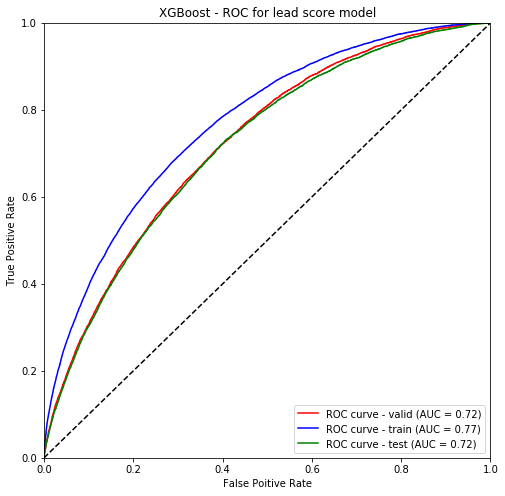

In [488]:
draw_ROC(gbm, dtrain, dvalid, dtest, y_train, y_valid, df_test_Y)

In [424]:
y_pred = gbm.predict(dtest)

In [425]:
print(y_pred.max(), y_pred.min(), y_pred.mean())

0.831652 0.00651231 0.172906


In [426]:
importance = gbm.get_fscore()

In [429]:
df_importance = pd.DataFrame.from_dict(importance, orient='index').reset_index()
df_importance.columns = ['feature', 'fscore']

In [430]:
df_importance['fscore'] = df_importance['fscore'] / df_importance['fscore'].sum()

In [431]:
df_importance.sort_values(['fscore'], ascending=False, inplace=True)
df_importance

,feature,fscore
2,dti,0.042035
1,intrate,0.034946
49,zipcode,0.033513
4,emptitle_freq,0.030596
21,installment,0.030270
55,mosinoldilacct,0.029490
33,bcopentobuy,0.029465
36,annualinc,0.028535
26,mosinoldrevtlop,0.027479
5,avgcurbal,0.025367


<Figure size 2304x2304 with 0 Axes>

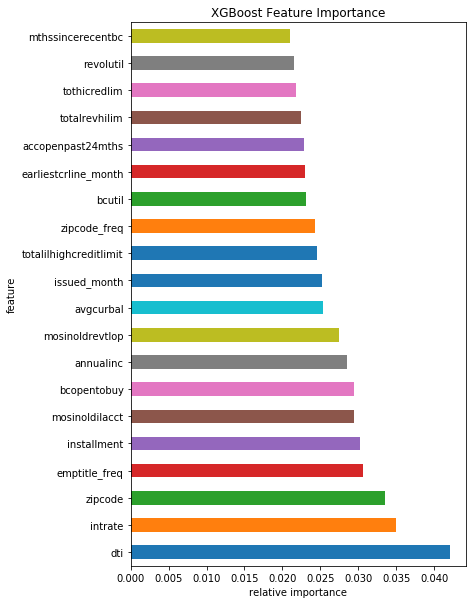

In [432]:
plt.figure(figsize=(32, 32))

df_importance[:20].plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6,10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')

## Save model

In [433]:
import pickle

In [434]:
with open('xgb_model.pkl', 'wb') as pkl_file:
    pickle.dump(gbm, pkl_file)

In [435]:
# pickcle.dump(gbm, open('model.pkl', "wb"))

In [436]:
from sklearn.externals import joblib
joblib.dump(gbm, "pima.joblib.dat")

['pima.joblib.dat']

In [438]:
?lgb.Dataset()

# LightGBM

In [443]:
from bayes_opt import BayesianOptimization


lgtrain = lgb.Dataset(X_train, y_train)
             
lgvalid = lgb.Dataset(X_valid, y_valid)
         

def lgb_evaluate(
                 num_leaves,
                 max_depth,
                 min_sum_hessian_in_leaf,
                 min_gain_to_split,
                 feature_fraction,
                 bagging_fraction,
                 lambda_l2,
                 lambda_l1
                 ):
    params = dict()
    params['objective'] = 'binary'
    params['learning_rate'] = 0.1
    params['seed'] = 1234
    params['max_bin'] = 127
    params['num_leaves'] = int(num_leaves)    
    params['min_sum_hessian_in_leaf'] = int(min_sum_hessian_in_leaf)
    params['min_gain_to_split'] = min_gain_to_split    
    params['feature_fraction'] = feature_fraction
    params['bagging_fraction'] = bagging_fraction
    params['bagging_freq'] = 1
    params['lambda_l2'] = lambda_l2
    params['lambda_l1'] = lambda_l1   
    params["metric"] = 'rmse'

    model = lgb.train(
                params,
                lgtrain,
                num_boost_round=16000,
                valid_sets=[lgtrain, lgvalid],
                valid_names=['train','valid'],
                early_stopping_rounds=200,
                verbose_eval=False
    )
    best_iteration = model.best_iteration
    best_score = model.best_score['valid']['rmse']
    print (', best_score: %f, best_iteration: %d' % (best_score, best_iteration))

    return -best_score


lgb_BO = BayesianOptimization(lgb_evaluate, 
                             {
#                                  'max_bin': (100, 300),
                              'num_leaves': (63, 511),
                              'max_depth': (31, 127),
                              'min_sum_hessian_in_leaf': (10, 100),
                              'min_gain_to_split': (0,0.5),
                              'feature_fraction': (0.2, 0.5),
                              'bagging_fraction': (0.8,1),
                              'lambda_l2': (50,500),
                              'lambda_l1': (0.01,1)
                             }
                            )

lgb_BO.maximize(init_points=5, n_iter=40)

Initialization
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   bagging_fraction |   feature_fraction |   lambda_l1 |   lambda_l2 |   max_depth |   min_gain_to_split |   min_sum_hessian_in_leaf |   num_leaves | 
, best_score: 0.361151, best_iteration: 169
    1 | 00m55s |   -0.36115 |             0.9532 |             0.3017 |      0.7795 |    173.0909 |    115.7606 |              0.2307 |                   56.6857 |     396.5623 | 
, best_score: 0.361216, best_iteration: 208
    2 | 00m38s |   -0.36122 |             0.9417 |             0.2690 |      0.1699 |    383.9182 |     35.6262 |              0.2902 |                   67.6238 |      64.6288 | 
, best_score: 0.361155, best_iteration: 237
    3 | 00m44s |   -0.36116 |             0.8909 |             0.3246 |      0.8352 |    293.5460 |     31.3824 |              0.1627 

C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Bayesian Optimization
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   bagging_fraction |   feature_fraction |   lambda_l1 |   lambda_l2 |   max_depth |   min_gain_to_split |   min_sum_hessian_in_leaf |   num_leaves | 
, best_score: 0.361216, best_iteration: 147
    6 | 01m01s |   -0.36122 |             0.9046 |             0.3110 |      0.1206 |     59.9984 |    125.9529 |              0.0698 |                   37.7418 |      80.5366 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00024275]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 47, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00072972]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 57, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00118456]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 71, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)


, best_score: 0.361491, best_iteration: 155
    7 | 01m04s |   -0.36149 |             0.8825 |             0.2098 |      0.1923 |     55.0134 |    112.0656 |              0.3095 |                   98.9782 |     509.8211 | 
, best_score: 0.361040, best_iteration: 236
    8 | 01m01s |   -0.36104 |             0.9221 |             0.3665 |      0.2010 |    317.1080 |    124.6257 |              0.3669 |                   96.5297 |     118.4597 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([  2.51679303e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.0002638]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 49, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.00014299]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 74, 'nit': 8, 'warnflag': 2}
  " state: %s" % convergence_dict)


, best_score: 0.361126, best_iteration: 238
    9 | 01m05s |   -0.36113 |             0.9366 |             0.3823 |      0.9892 |    357.9435 |    123.1169 |              0.3636 |                   20.4181 |      79.8653 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -7.89555415e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 55, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00010186]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 63, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00036882]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 56, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\An

, best_score: 0.361086, best_iteration: 207
   10 | 01m05s |   -0.36109 |             0.9071 |             0.2552 |      0.8892 |    175.6197 |     76.3179 |              0.4997 |                   95.0319 |     186.8032 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -6.55684180e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 64, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00059994]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 49, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00063938]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 65, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


, best_score: 0.361419, best_iteration: 184
   11 | 01m14s |   -0.36142 |             0.8211 |             0.2392 |      0.6108 |    177.7295 |    123.1866 |              0.2631 |                   16.4580 |     318.4969 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00138844]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


, best_score: 0.361042, best_iteration: 256
   12 | 01m04s |   -0.36104 |             0.9420 |             0.4972 |      0.4524 |    492.7878 |     31.0619 |              0.3005 |                   98.9452 |     485.3288 | 
, best_score: 0.361079, best_iteration: 216
   13 | 01m02s |   -0.36108 |             0.8622 |             0.3809 |      0.8107 |    244.1559 |     33.6971 |              0.0200 |                   92.2676 |     462.6480 | 
, best_score: 0.361067, best_iteration: 228
   14 | 01m06s |   -0.36107 |             0.9946 |             0.4234 |      0.9364 |    333.7146 |    125.6327 |              0.3586 |                   95.1492 |     508.4034 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -1.45908416e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 57, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)


, best_score: 0.361130, best_iteration: 330
   15 | 01m06s |   -0.36113 |             0.8569 |             0.3099 |      0.6419 |    493.7144 |    126.2794 |              0.3342 |                   85.5923 |      70.8843 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00904268]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 30, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.0010302]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 58, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([  2.82291976e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 56, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Ana

, best_score: 0.361131, best_iteration: 220
   16 | 01m05s |   -0.36113 |             0.8560 |             0.4719 |      0.9556 |    336.4747 |     37.2794 |              0.1068 |                   72.7738 |     389.3721 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -1.06785119e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 55, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -7.27202732e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 50, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


, best_score: 0.361111, best_iteration: 213
   17 | 01m01s |   -0.36111 |             0.8913 |             0.3931 |      0.9621 |    217.3812 |    113.0404 |              0.2458 |                   98.5832 |     169.5885 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00500337]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 49, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00381359]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 49, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


, best_score: 0.361188, best_iteration: 182
   18 | 00m57s |   -0.36119 |             0.8214 |             0.2966 |      0.5564 |    151.3586 |     65.1242 |              0.3998 |                   82.2566 |      79.7220 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -1.87164915e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 64, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)


, best_score: 0.361199, best_iteration: 240
   19 | 01m07s |   -0.36120 |             0.9861 |             0.2520 |      0.9274 |    328.6914 |     85.7313 |              0.0117 |                   83.0837 |     254.2508 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -1.38379401e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 60, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -2.90466705e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


, best_score: 0.361296, best_iteration: 131
   20 | 00m59s |   -0.36130 |             0.9318 |             0.2894 |      0.6563 |     82.6069 |     96.3030 |              0.3290 |                   91.8704 |     244.4787 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00039553]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 50, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -4.56837151e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 56, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


, best_score: 0.361392, best_iteration: 285
   21 | 01m08s |   -0.36139 |             0.9036 |             0.2239 |      0.9316 |    214.4178 |    104.2076 |              0.4272 |                   99.2505 |     426.7466 | 
, best_score: 0.361583, best_iteration: 88
   22 | 01m13s |   -0.36158 |             0.8623 |             0.3192 |      0.9851 |     51.2711 |     46.7936 |              0.4924 |                   10.2234 |     504.7106 | 
, best_score: 0.361292, best_iteration: 205
   23 | 01m08s |   -0.36129 |             0.8919 |             0.4041 |      0.5399 |    490.1345 |    125.8925 |              0.2758 |                   20.3816 |     510.5828 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00841824]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 65, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -1.22692072e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 50, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)


, best_score: 0.361150, best_iteration: 214
   24 | 01m11s |   -0.36115 |             0.9148 |             0.4241 |      0.1716 |    375.6590 |     39.9762 |              0.4260 |                   34.9052 |     510.3138 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -8.83932080e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 48, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -7.34029345e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 80, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00016585]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)


, best_score: 0.361420, best_iteration: 123
   25 | 01m05s |   -0.36142 |             0.8403 |             0.4527 |      0.9549 |    167.2315 |    126.8780 |              0.0079 |                   50.8594 |     509.3604 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.00025513]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 56, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00011044]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


, best_score: 0.361063, best_iteration: 265
   26 | 01m15s |   -0.36106 |             0.9712 |             0.3507 |      0.4918 |    383.2076 |    123.3848 |              0.1209 |                   76.1313 |      72.5479 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00022927]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 68, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([  4.14614478e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 50, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00239813]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 69, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)


, best_score: 0.361183, best_iteration: 272
   27 | 01m28s |   -0.36118 |             0.9835 |             0.3892 |      0.6846 |    446.2460 |    101.9114 |              0.0679 |                   76.2913 |     506.5099 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00501266]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 48, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


, best_score: 0.361403, best_iteration: 151
   28 | 01m15s |   -0.36140 |             0.8901 |             0.4475 |      0.8839 |    120.4876 |     47.1601 |              0.2313 |                   99.1424 |     359.8037 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00014387]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 64, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


, best_score: 0.361045, best_iteration: 249
   29 | 01m18s |   -0.36105 |             0.8441 |             0.4411 |      0.4107 |    493.9733 |    123.6944 |              0.4567 |                   39.1540 |     232.5910 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00390087]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 59, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)


, best_score: 0.361045, best_iteration: 230
   30 | 01m19s |   -0.36105 |             0.9236 |             0.4358 |      0.1333 |    324.1141 |    109.7253 |              0.4437 |                   61.0194 |     123.7478 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.00043773]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 62, 'nit': 8, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.00043485]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)


, best_score: 0.361044, best_iteration: 237
   31 | 01m16s |   -0.36104 |             0.9269 |             0.3703 |      0.1323 |    279.1205 |     31.1556 |              0.1240 |                   67.1002 |     493.8764 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -1.89094571e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 66, 'nit': 8, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -3.50453192e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 70, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00035532]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 69, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)


, best_score: 0.360931, best_iteration: 283
   32 | 01m09s |   -0.36093 |             0.9609 |             0.4251 |      0.8977 |    395.5983 |    124.5314 |              0.4925 |                   63.8208 |     481.7329 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.0031232]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 93, 'nit': 8, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00682091]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 56, 'nit': 8, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00256382]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda

, best_score: 0.361159, best_iteration: 228
   33 | 01m11s |   -0.36116 |             0.8781 |             0.4115 |      0.8399 |    382.9204 |     47.2433 |              0.3490 |                   60.4094 |     182.6814 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.00160247]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -2.48067081e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00025079]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\An

, best_score: 0.361198, best_iteration: 266
   34 | 01m14s |   -0.36120 |             0.8192 |             0.2486 |      0.8895 |    353.4724 |     33.0001 |              0.3056 |                   59.1080 |     497.0190 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -1.03495986e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 48, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00023871]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00025743]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 71, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)


, best_score: 0.361122, best_iteration: 237
   35 | 01m14s |   -0.36112 |             0.9201 |             0.3183 |      0.6056 |    307.6136 |     36.4766 |              0.2140 |                   89.6713 |     255.0174 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -1.05649233e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 50, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([  1.17598101e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 56, 'nit': 9, 'warnflag': 2}
  " state: %s" % convergence_dict)


, best_score: 0.361215, best_iteration: 261
   36 | 01m17s |   -0.36121 |             0.8993 |             0.4616 |      0.9057 |    472.2538 |     91.4448 |              0.4292 |                   41.6644 |     255.3181 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -2.78243242e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 65, 'nit': 10, 'warnflag': 2}
  " state: %s" % convergence_dict)


, best_score: 0.361119, best_iteration: 212
   37 | 01m12s |   -0.36112 |             0.9914 |             0.4959 |      0.2418 |    348.4484 |     87.8167 |              0.3577 |                   79.3506 |     258.8744 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -3.39592807e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 77, 'nit': 8, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.00392972]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -2.05957331e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 58, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\mao

, best_score: 0.361071, best_iteration: 220
   38 | 01m15s |   -0.36107 |             0.9939 |             0.3854 |      0.9383 |    366.8409 |     47.6338 |              0.4117 |                   61.5175 |     155.0209 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.01944972]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 74, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.00012627]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 56, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -1.78873597e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 61, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


, best_score: 0.361168, best_iteration: 164
   39 | 01m13s |   -0.36117 |             0.9802 |             0.4259 |      0.9482 |    178.2158 |     37.9827 |              0.3236 |                   88.9670 |     508.0797 | 
, best_score: 0.361120, best_iteration: 237
   40 | 01m08s |   -0.36112 |             0.8836 |             0.4194 |      0.5654 |    402.9112 |    109.8284 |              0.3856 |                   51.9520 |      78.3839 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -2.53939106e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 77, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00309434]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 55, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)


, best_score: 0.361008, best_iteration: 258
   41 | 01m05s |   -0.36101 |             0.9005 |             0.3834 |      0.6969 |    443.5742 |     47.3529 |              0.3850 |                   60.3742 |     474.7771 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00014653]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 58, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00011406]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00872115]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 83, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anacond

, best_score: 0.361201, best_iteration: 255
   42 | 01m13s |   -0.36120 |             0.9500 |             0.3910 |      0.3801 |    478.5011 |    103.2623 |              0.0546 |                   91.2321 |     365.2153 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.00036359]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 78, 'nit': 9, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.02210753]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 56, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


, best_score: 0.361253, best_iteration: 135
   43 | 01m09s |   -0.36125 |             0.8404 |             0.4506 |      0.9940 |    182.5981 |     34.8606 |              0.0472 |                   38.9551 |     430.9252 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.00037797]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 62, 'nit': 8, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00470178]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


, best_score: 0.361110, best_iteration: 135
   44 | 01m03s |   -0.36111 |             0.8830 |             0.4943 |      0.3221 |    103.3227 |    123.8499 |              0.3042 |                   86.7482 |     375.4617 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.01164287]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 57, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00699029]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 77, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


, best_score: 0.361142, best_iteration: 219
   45 | 01m01s |   -0.36114 |             0.9138 |             0.3942 |      0.2138 |    324.5040 |     69.8550 |              0.4262 |                   61.7868 |      68.5253 | 


C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.00480081]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00018633]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anaconda3\envs\project3_machinelearning\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00044425]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\maoli\Anacond

In [444]:
lgb_BO_scores = pd.DataFrame(lgb_BO.res['all']['params'])
lgb_BO_scores['score'] = pd.DataFrame(lgb_BO.res['all']['values'])
lgb_BO_scores = lgb_BO_scores.sort_values(by='score',ascending=False)
lgb_BO_scores.to_csv("tuned_lgb_parameters.csv", index=False)
lgb_BO_scores.head()

,bagging_fraction,feature_fraction,lambda_l1,lambda_l2,max_depth,min_gain_to_split,min_sum_hessian_in_leaf,num_leaves,score
26,0.960901,0.425083,0.897724,395.598298,124.531387,0.492541,63.820767,481.732871,-0.360931
35,0.900532,0.383365,0.696920,443.574233,47.352888,0.385011,60.374196,474.777106,-0.361008
2,0.922089,0.366550,0.201030,317.107962,124.625680,0.366923,96.529676,118.459700,-0.361040
6,0.942006,0.497201,0.452380,492.787755,31.061868,0.300492,98.945180,485.328783,-0.361042
25,0.926936,0.370318,0.132309,279.120539,31.155620,0.123990,67.100203,493.876406,-0.361044


## Validation with smaller learning rate

{'objective': 'binary', 'metric': 'rmse', 'learning_rate': 0.019, 'num_leaves': 481, 'max_depth': 124, 'min_sum_hessian_in_leaf': 63, 'min_gain_to_split': 0.49254106365848827, 'feature_fraction': 0.4250831885308463, 'bagging_fraction': 0.9609013556388786, 'bagging_freq': 1, 'lambda_l2': 395.5982980065363, 'lambda_l1': 0.8977240009297065}
Training until validation scores don't improve for 200 rounds.
[200]	train's rmse: 0.362691	valid's rmse: 0.364021
[400]	train's rmse: 0.358198	valid's rmse: 0.36202
[600]	train's rmse: 0.354963	valid's rmse: 0.361413
[800]	train's rmse: 0.352084	valid's rmse: 0.361111
[1000]	train's rmse: 0.349434	valid's rmse: 0.360995
[1200]	train's rmse: 0.346964	valid's rmse: 0.360929
[1400]	train's rmse: 0.34465	valid's rmse: 0.360896
[1600]	train's rmse: 0.342506	valid's rmse: 0.360883
Early stopping, best iteration is:
[1461]	train's rmse: 0.343961	valid's rmse: 0.360877
Model Evaluation Stage
RMSE: 0.36087654696


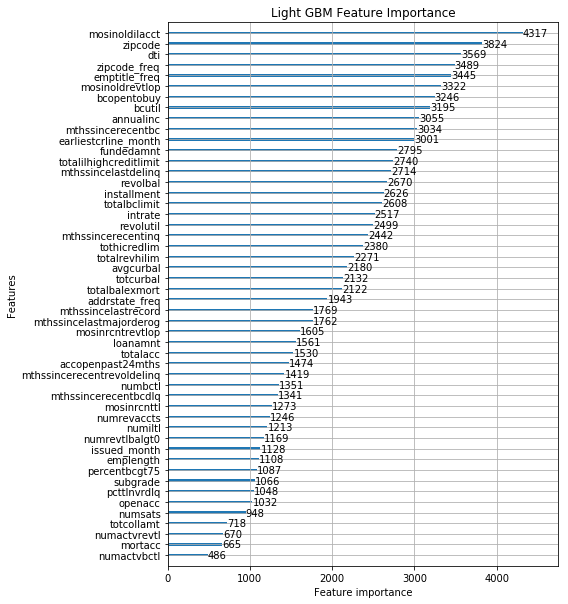

In [447]:
params = lgb_BO_scores.iloc[0].to_dict()
best_lgb_params = dict()
best_lgb_params['objective'] = 'binary'
best_lgb_params["metric"] = 'rmse'
best_lgb_params['learning_rate'] = 0.019 # Smaller learning rate

best_lgb_params['num_leaves'] = int(params['num_leaves'])    
best_lgb_params['max_depth'] = int(params['max_depth'])    
best_lgb_params['min_sum_hessian_in_leaf'] = int(params['min_sum_hessian_in_leaf'])
best_lgb_params['min_gain_to_split'] = params['min_gain_to_split']     
best_lgb_params['feature_fraction'] = params['feature_fraction']
best_lgb_params['bagging_fraction'] = params['bagging_fraction']
best_lgb_params['bagging_freq'] = 1
best_lgb_params['lambda_l2'] = params['lambda_l2']
best_lgb_params['lambda_l1'] = params['lambda_l1']

print (best_lgb_params)

lgb_clf = lgb.train(
    best_lgb_params,
    lgtrain,
    num_boost_round=16000,
    valid_sets=[lgtrain, lgvalid],
    valid_names=['train','valid'],
    early_stopping_rounds=200,
    verbose_eval=200
)

# Feature Importance Plot
f, ax = plt.subplots(figsize=[7,10])
lgb.plot_importance(lgb_clf, max_num_features=50, ax=ax)
plt.title("Light GBM Feature Importance")
plt.savefig('feature_import.png')

print("Model Evaluation Stage")
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, lgb_clf.predict(X_valid))))


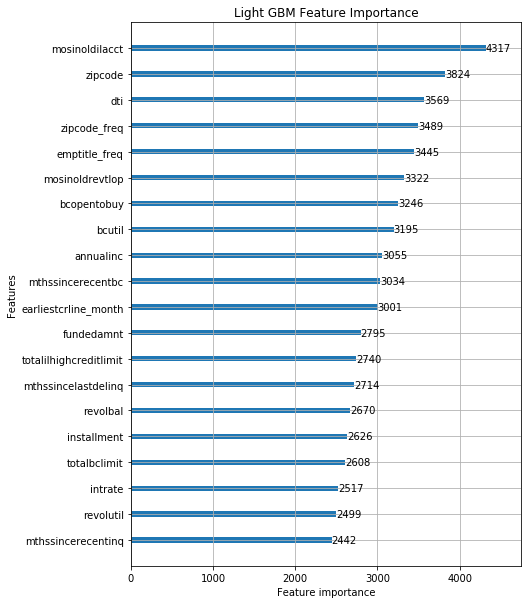

In [462]:
# Feature Importance Plot Top 20

f1, ax1 = plt.subplots(figsize=[7,10])
lgb.plot_importance(lgb_clf, max_num_features=20, ax=ax1)
plt.title("Light GBM Feature Importance")
plt.savefig('feature_import1.png')

Area under the ROC curve - validation: 0.723634
Area under the ROC curve - train: 0.797958
Area under the ROC curve - test: 0.717738


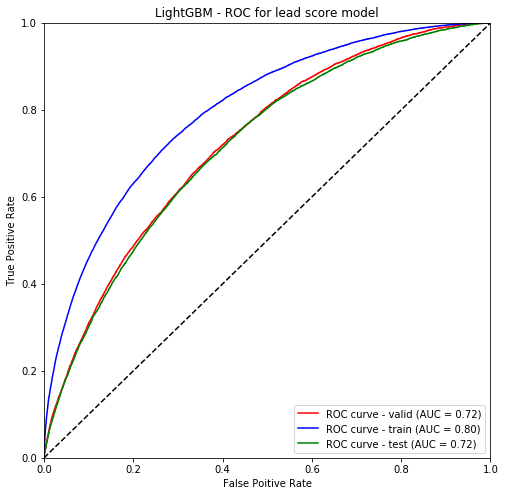

In [486]:
probas_ = lgb_clf.predict(X_valid)
probas_1 = lgb_clf.predict(X_train)
probas_2 = lgb_clf.predict(df_test_X)
    
fpr, tpr, thresholds = roc_curve(y_valid, probas_) # fpr: false positive rate, tpr: true positive rate
fpr_1, tpr_1, thresholds_1 = roc_curve(y_train, probas_1)
fpr_2, tpr_2, thresholds_2 = roc_curve(df_test_Y, probas_2)
    
roc_auc = auc(fpr, tpr)
roc_auc_1 = auc(fpr_1, tpr_1)
roc_auc_2 = auc(fpr_2, tpr_2)
    
print("Area under the ROC curve - validation: %f" % roc_auc)
print("Area under the ROC curve - train: %f" % roc_auc_1)
print("Area under the ROC curve - test: %f" % roc_auc_2)
    
# Plot ROC curve
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='ROC curve - valid (AUC = %0.2f)' % roc_auc, color='r')
plt.plot(fpr_1, tpr_1, label='ROC curve - train (AUC = %0.2f)' % roc_auc_1, color='b')
plt.plot(fpr_2, tpr_2, label='ROC curve - test (AUC = %0.2f)' % roc_auc_2, color='g')
    
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
    
plt.xlabel('False Poitive Rate')
plt.ylabel('True Positive Rate')
plt.title('LightGBM - ROC for lead score model')
plt.legend(loc="lower right")